# **Goal**


In this project, we aim to leverage customer data to perform segmentation using clustering techniques. By identifying distinct groups within the customer base, we can uncover patterns that inform targeted marketing, personalized customer experiences, and improved customer retention strategies. The primary objective is to create clusters of customers based on relevant features, enabling a deeper understanding of customer behaviors and preferences.

**Approach :**

To achieve our goal, we will go through the following steps:

1. **Data Exploration and Preprocessing:** We will load the customer dataset and examine the features, identifying missing values, outliers, and correlations. Any necessary data transformations, such as scaling or encoding categorical variables, will be applied to ensure the data is suitable for clustering.

2. **Feature Selection and Engineering:** Based on our exploratory analysis, we may create new features or select relevant ones that enhance clustering performance and interpretability.

3. **Clustering Model Implementation:** We will experiment with various clustering algorithms, such as K-means, Hierarchical Clustering, or DBSCAN, to identify customer segments. For each model, we will determine the optimal number of clusters using techniques like the elbow method or silhouette scores.

4. **Model Evaluation and Interpretation:** After identifying clusters, we will evaluate the coherence and separability of each group. This includes analyzing the characteristics of each cluster and understanding how they differ from each other.

5. **Insights and Recommendations:** Based on the clusters identified, we will interpret the results and provide actionable recommendations for marketing strategies, product development, or customer service adjustments.



# **Dataset Specification:**

1. **Demographic Features**

  1. **Age:** Customer's age. It often provides insight into customer life stage and associated preferences, which can influence product and service choices.

  2. **Gender:** Binary or multi-class feature indicating customer gender. This can be relevant for understanding preferences, especially if gender influences product interest or engagement level.

  3. **Income:** Annual or monthly income of the customer. Higher-income segments may have different purchasing behaviors and preferences.

  4. **Occupation:** Profession or industry of the customer. Useful to understand purchasing capacity and likely product interests.

2. **Behavioral Features**

  1. **Purchase History:** Frequency or amount of purchases within a given period. High-value or high-frequency customers may form distinct clusters representing loyal customers.

  2. **Transaction Amount:** Total or average amount spent per transaction. This feature can help to differentiate high spenders from budget-conscious customers.

  3. **Product Category:** Preferred or frequently purchased product categories.
  Segmenting customers by product preference can reveal niche interests.

  4. **Last Purchase Date:** The time since the customer’s last purchase. Useful for identifying potentially inactive customers or loyal repeat buyers.

3. **Engagement Features**

  1. **Customer Tenure:** The length of time the customer has been associated with the business. Longer-tenure customers may have different preferences and purchasing behaviors.

  2. **Website/App Usage:** Data on website visits, app logins, or time spent on the platform. Helps identify engaged users versus those who may need re-engagement strategies.

  3. **Discount Usage:** Frequency of using discounts or promotional offers. Customers highly responsive to discounts can be targeted differently from full-price buyers.

4. **Geographic Features**

  1. **Location:** City, state, or region information. Geographic segments can provide insight into local product demand and regional marketing opportunities.

  2. **Store Visit Frequency:** For businesses with physical locations, the frequency of store visits per region. Helps in understanding locality-based customer segments.

5. **Psychographic Features (if available)**

  1. **Customer Preferences:** Survey or preference data indicating product style, brand affinity, or values. Psychographics can create nuanced customer profiles, ideal for targeted marketing.

6. **Derived Features**

  1. **Recency, Frequency, Monetary (RFM) Scores:** Aggregate of recency (time since last purchase), frequency (total transactions), and monetary value (total spent). This composite score is commonly used for customer segmentation to identify high-value and frequent buyers.

  2. **Engagement Score:** Calculated based on interactions with the business, such as purchases, site visits, or response to offers. This feature helps in identifying highly engaged customers.

# **Kaggle API initialization**

We are importing the dataset from kaggle here to performe the necessary takes on it.

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirhosseinh4860","key":"efda400e2ecca1bae6f619f2b522b678"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

# **Downloading dataset**

In [ ]:
! kaggle datasets download -d alirezachahardoli/customer-data-clustring

Dataset URL: https://www.kaggle.com/datasets/alirezachahardoli/customer-data-clustring
License(s): unknown
  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 73.7MB/s]


In [ ]:
! unzip /content/customer-data-clustring.zip

Archive:  /content/customer-data-clustring.zip
  inflating: Customer-Data - 2.csv   


# **Data Analysis**

In order to make any decision related to Data, we need to see and analyze our data. We will be doing just that here, then we will get to doing the actual Machine Learning.

# **Import Libraries**

**Explanation of Libraries :**

The code snippet in the image imports the following essential Python libraries commonly used for data analysis and visualization:

**pandas** (pd) :  A powerful library for data manipulation and analysis, especially for handling structured data (e.g., DataFrames).

**numpy** (np) :  Used for numerical computations, especially for handling arrays and performing mathematical operations efficiently.

**matplotlib.pyplot** (plt) :  A popular plotting library for creating static, animated, and interactive visualizations.

**seaborn** (sns) : Built on top of matplotlib, seaborn makes it easier to create more attractive and informative statistical plots.

These libraries are often used together for data science tasks, such as data visualization, exploration, and manipulation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Initialization**

**pd:** This is the commonly used alias for the Pandas library. To use it, Pandas must be imported earlier in the code, typically with import pandas as pd.

**pd.read_csv:** This function reads the CSV file specified in the parentheses and loads it into a DataFrame. The function assumes that each row represents a record and each column represents a field in the record.

**"/content/Customer-Data - 2.csv":** This is the path to the CSV file, where "/content/" is typically the directory used in Google Colab or similar environments. The file Customer-Data - 2.csv should be located here for the function to access it.

**df:** This is a variable name that will hold the resulting DataFrame, which allows easy access to the data within the file for further manipulation and analysis.

After running this code, df will contain the data from Customer-Data - 2.csv, and you can perform operations such as data analysis, filtering, and visualization on this DataFrame.

In [ ]:
df = pd.read_csv("/content/Customer-Data - 2.csv")
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

df.describe() provides summary statistics for the numerical columns in the DataFrame. It includes metrics like mean, standard deviation, min/max, and percentiles. This is an essential part of exploratory data analysis (EDA) to understand the distribution of the data.

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204822        592.437371   
std     2081.531879           0.236904   2136.634780       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

df.info() provides a concise summary of the DataFrame, including the number of non-null values, data types of each column, and memory usage. It is helpful for quickly understanding the structure of the dataset and identifying any columns that might need preprocessing (e.g., missing values, incorrect data types).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

This line checks for missing values (NaN values) in the DataFrame by column. isna() returns a DataFrame of boolean values where True indicates a missing value, and sum() aggregates the number of missing values for each column. This is important for identifying columns that may require handling for missing data.

In [ ]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

As you see here , we have 313 missing values (NaN values) in MINIMUM_PAYMENTS. in the Dataset

This command removes any duplicate rows in the DataFrame. The inplace=True argument ensures that the operation modifies the DataFrame directly, without returning a new copy. Removing duplicates is a key data cleaning step to avoid bias in clustering or other machine learning models due to repeated data points.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop(["CUST_ID"] , axis=1 , inplace=True)

This code snippet is designed to identify and isolate rows in the dataset where the MINIMUM_PAYMENTS column has missing values (NaN).

The df['MINIMUM_PAYMENTS'].isna() function checks each entry in the MINIMUM_PAYMENTS column for missing values (NaN).

The result is a Boolean Series (a list of True or False values) where True indicates that the MINIMUM_PAYMENTS value in that row is missing.

df[...] is then used to filter the DataFrame, selecting only those rows where MINIMUM_PAYMENTS is NaN.

This filtered data is stored in missing_data.

In [ ]:
missing_data = df[df['MINIMUM_PAYMENTS'].isna()]

missing_data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
...           ...                ...        ...               ...   
8919    14.524779           0.333333     152.00            152.00   
8929   371.527312           0.333333       0.00              0.00   
8935   183.817004           1.000000     465.90              0.00   
8944   193.571722           0.833333    1012.73           1012.73   
8946    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN               0.0       6  
8929    0.000000               NaN               0.0       6  
8935    0.000000   

In short, df.dropna(inplace=True) is used when removing rows with missing values is preferable to filling them, typically in datasets with minimal missing data or in scenarios where maintaining data integrity without imputing values is essential.

In [ ]:
df.dropna(inplace=True)

# Data Preprocessing **bold text**

Standardization: Apply standardization (e.g., StandardScaler from sklearn.preprocessing) to ensure clustering algorithms work effectively, especially for distance-based methods like KMeans or DBSCAN.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Visuallization

A pair plot is a matrix of scatter plots that provides a visual overview of the relationships between multiple variables in a dataset. Each scatter plot shows the relationship between two variables, while the diagonal typically displays histograms (or kernel density plots) for the distribution of each individual variable. Pair plots are especially useful in exploratory data analysis for understanding potential correlations, distributions, and outliers within multivariate data.

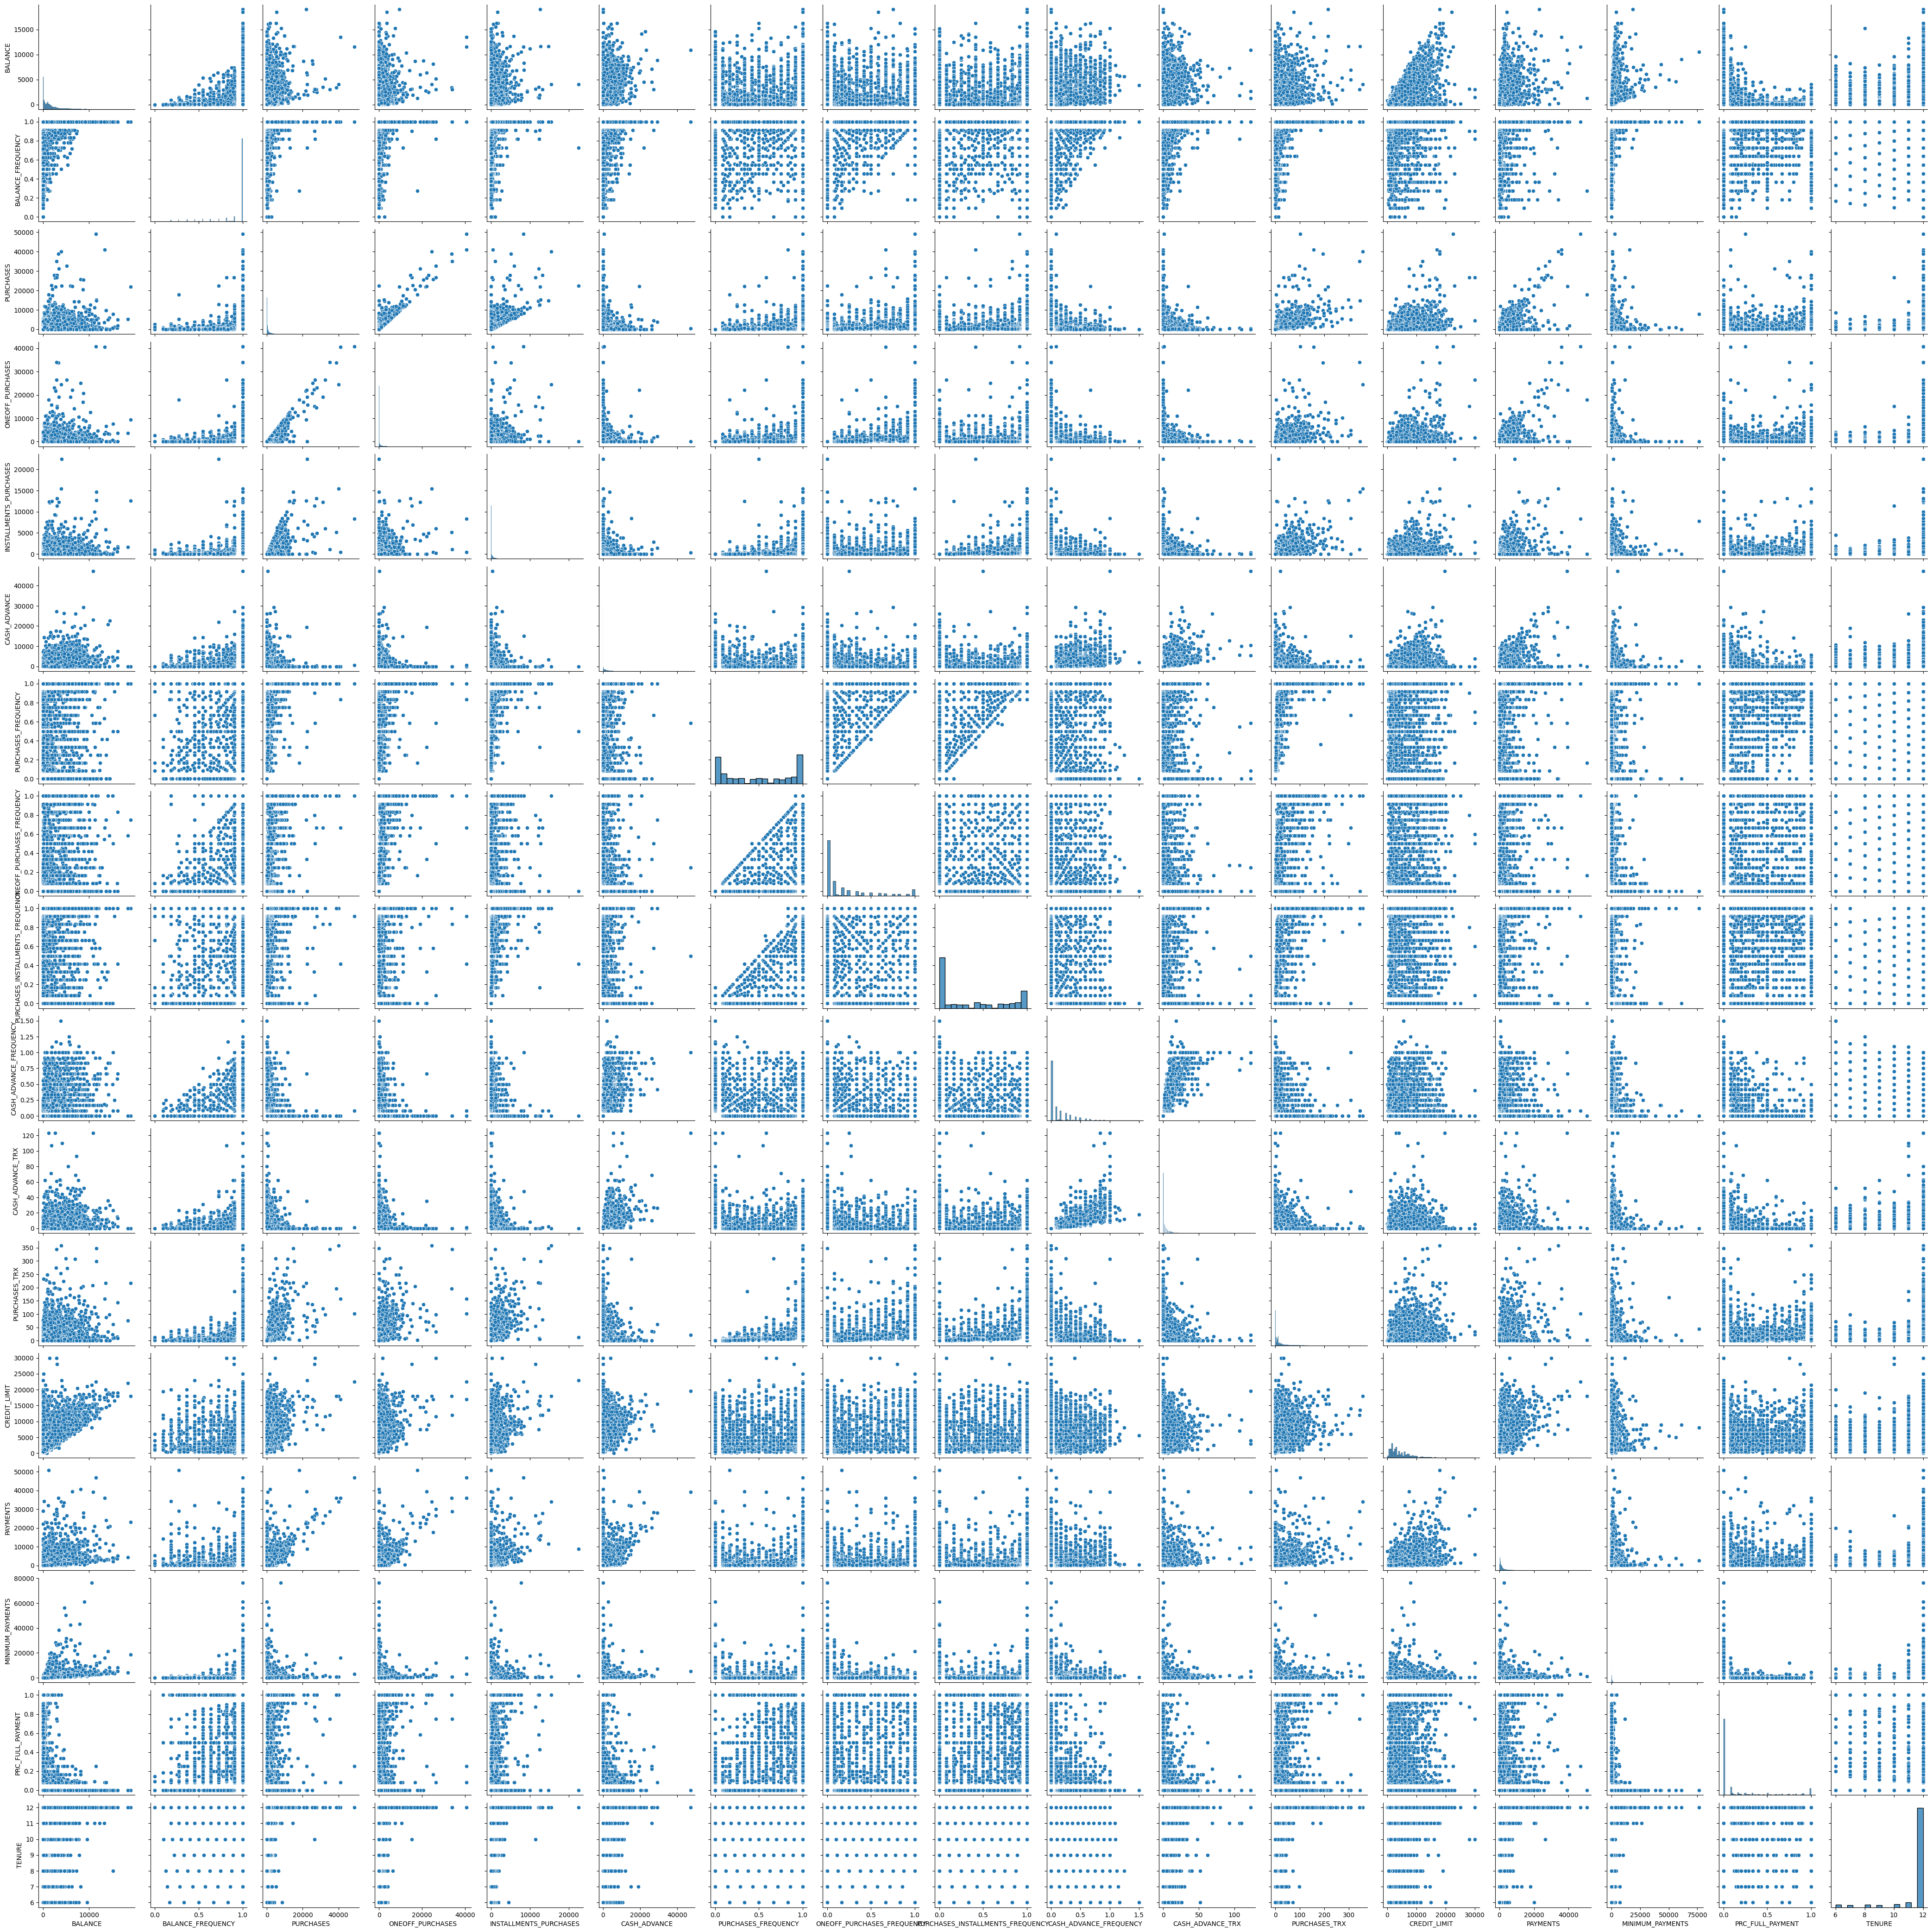

In [ ]:
sns.pairplot(df)
plt.show()

1. **Variable Distributions:**

   The diagonal histograms or density plots show the distribution of each variable individually. This helps in understanding if the data for each variable is skewed, normally distributed, or contains outliers.

   For example, some variables might have a right-skewed distribution, indicating that most values are on the lower end with a few high-value outliers.

2. **Relationships between Variables:**

   Scatter plots in the non-diagonal cells reveal relationships or correlations between pairs of variables.

  **Positive Correlations:** Variables that show an upward trend in their scatter
   plot (dots forming a line going up from left to right) have a positive correlation, meaning as one variable increases, so does the other.

   **Negative Correlations:** Variables with a downward trend show a negative
   correlation, where one variable increases as the other decreases.

   **No Clear Correlation:** If the scatter plot appears random without any
   discernible trend, the variables are likely uncorrelated.

3. **Clusters and Patterns:**

   If clustering is visible (groupings of points in certain areas of the scatter plots), it might indicate natural groupings in your data. These clusters can hint at segments within the data that could be explored further, possibly with clustering algorithms like KMeans.

4. **Outliers:**

   Outliers are often visible as points that lie far from the bulk of data in a scatter plot. Notably large deviations in the pair plots could suggest outliers that may need to be addressed, as they could influence model performance or distort the analysis.

In summary, your pair plot provides a compact way to explore relationships, distributions, and potential clusters within your dataset. This initial view helps identify which variables might be relevant for further analysis and modeling, especially if you are considering clustering or correlation-based methods.

A histplot (histogram plot) is a visualization that shows the distribution of a single variable by dividing data into bins and displaying the count of values in each bin as bars. It’s useful for understanding the spread, skewness, modality (e.g., unimodal, bimodal), and presence of outliers in data. In machine learning and data analysis, histograms help identify patterns in the data, which can inform preprocessing steps like normalization, scaling, or transformation.

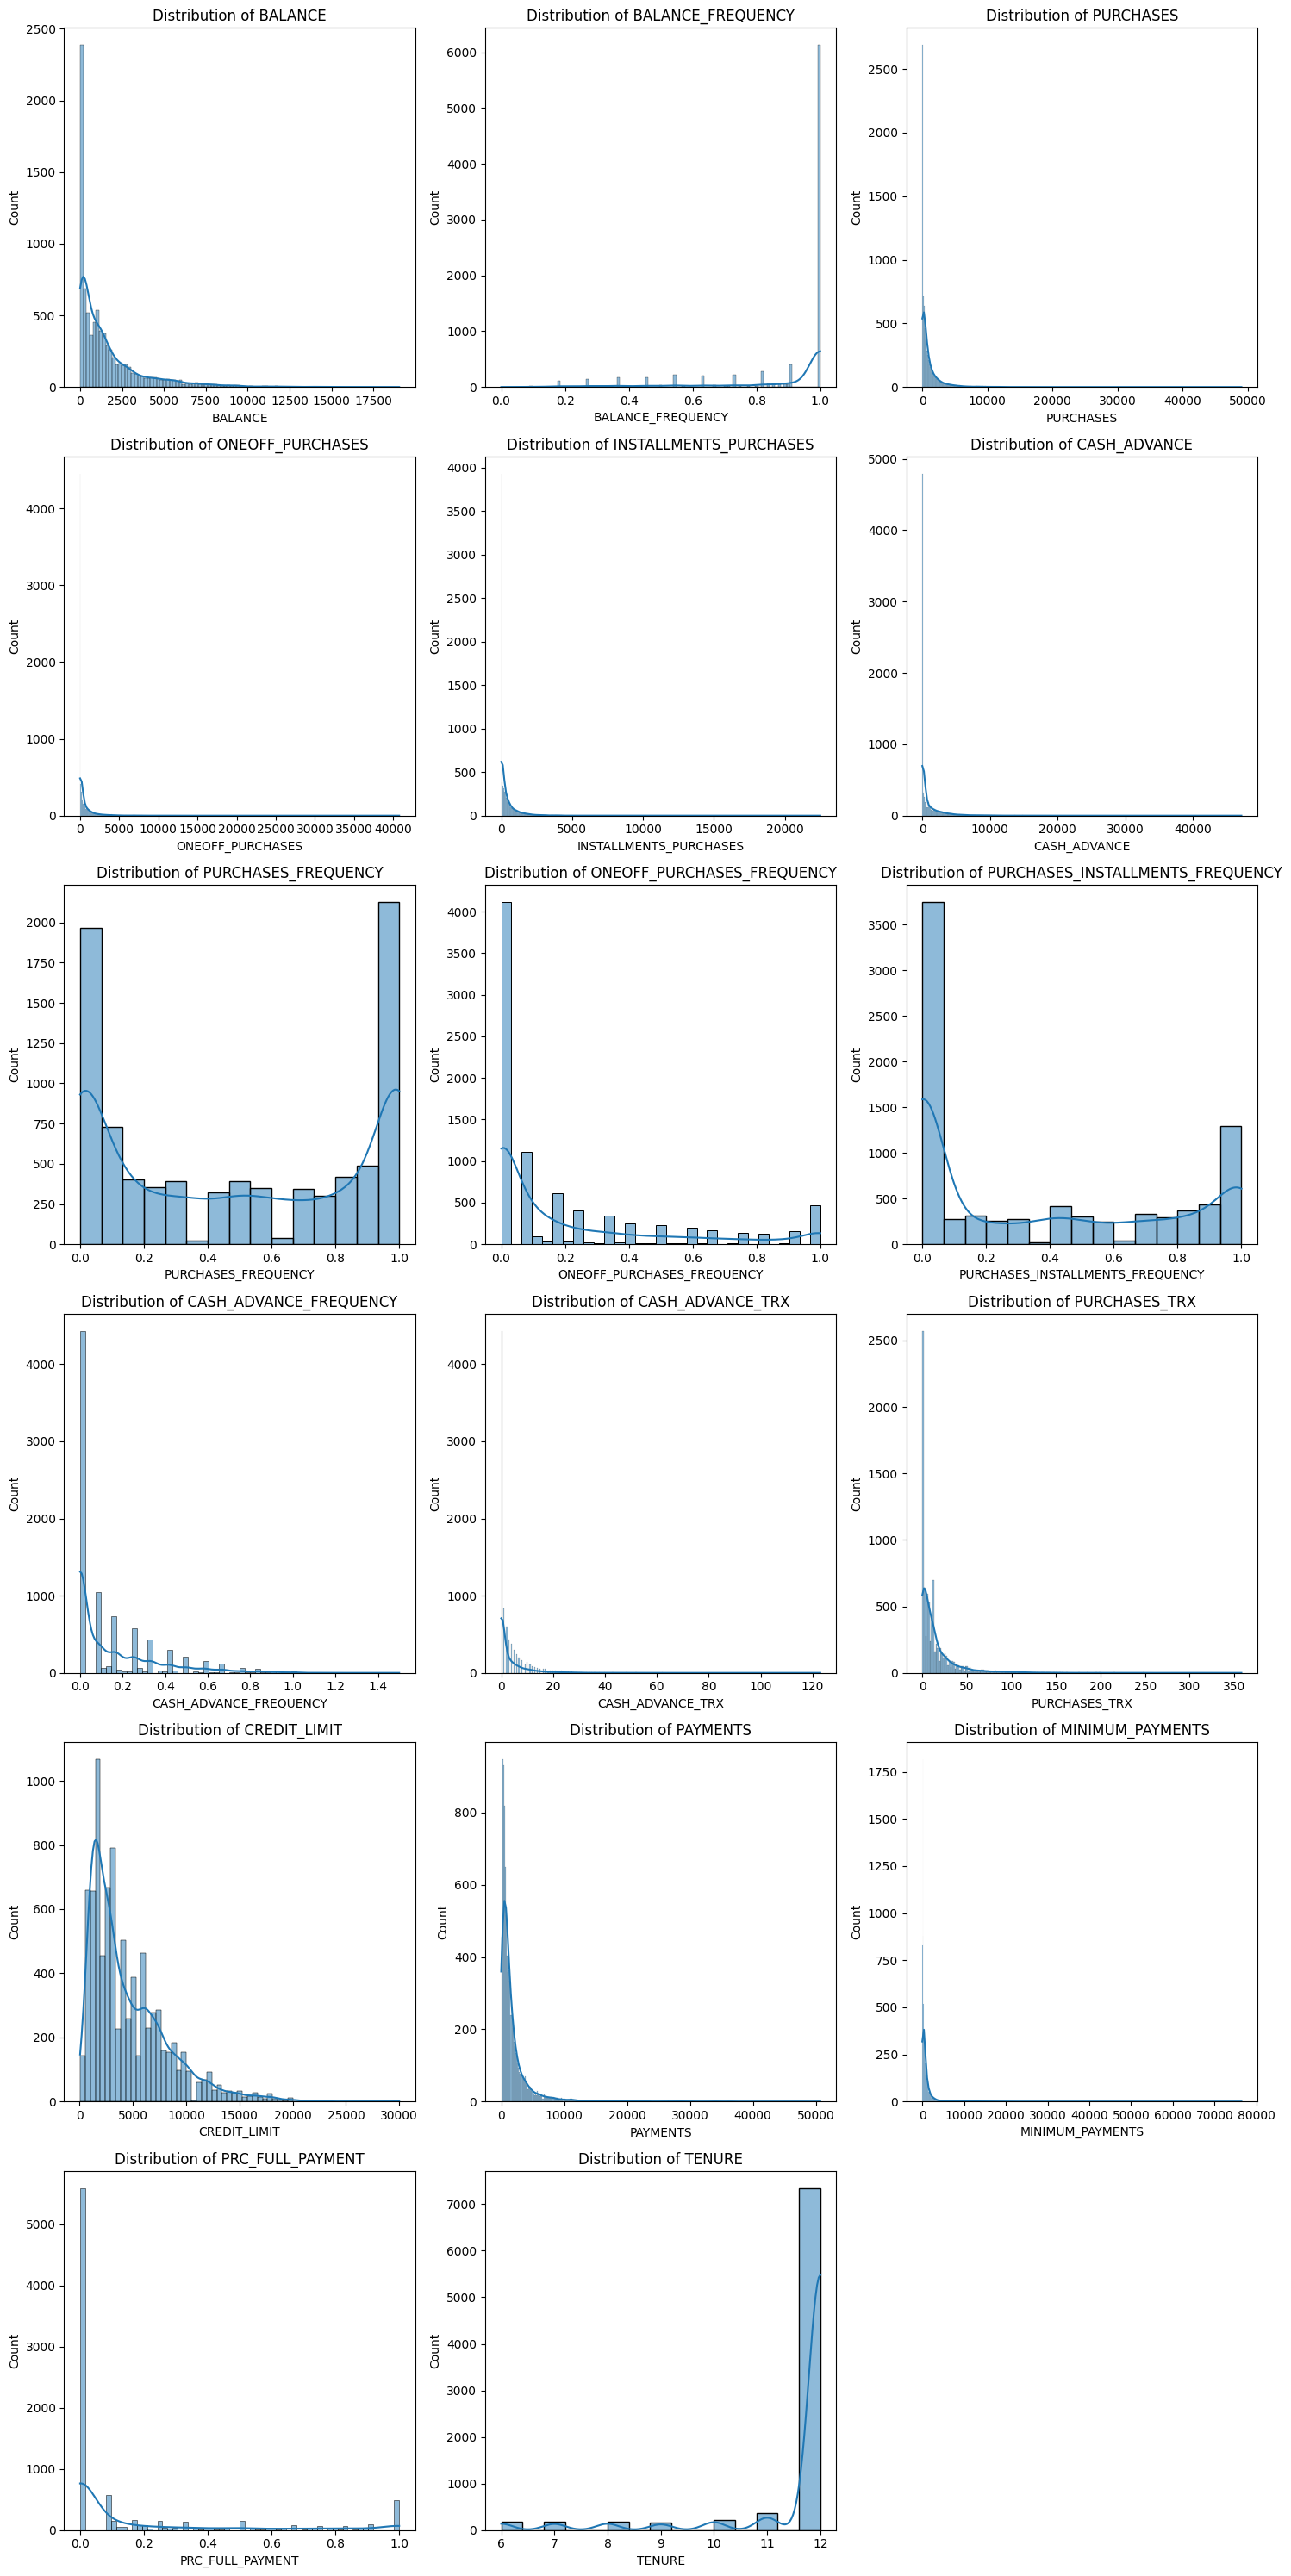

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3

n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()

plt.savefig('numeric_columns_distribution.png')


plt.show()


This set of histograms shows the distribution of various financial variables in your dataset. Here are key insights:

1. **Skewness and Outliers:**

   Many variables, such as BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, and PAYMENTS, exhibit right-skewed distributions. This means most values are concentrated on the lower end, with a long tail extending to the right due to a few high-value outliers.

   Right-skewed data suggests that the majority of customers have lower balances, purchases, and cash advances, while a few customers have significantly higher values.

2. **Frequency Variables:**

   Variables such as BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, and PURCHASES_INSTALLMENTS_FREQUENCY are more uniformly distributed between 0 and 1.

   For instance, BALANCE_FREQUENCY and PURCHASES_FREQUENCY have many values concentrated near 1, indicating frequent transactions or balance checks by most customers.

3. **Transactions:**

   The CASH_ADVANCE_TRX and PURCHASES_TRX distributions show that most customers have a low number of transactions, with only a few customers having a very high number of transactions. This is evident from the steep drop in the histogram bars for higher transaction values.

4. **Credit and Payments:**

   CREDIT_LIMIT also shows a right-skewed distribution, with most customers having lower credit limits and only a few having higher ones.

   PRC_FULL_PAYMENT indicates that many customers rarely pay their balance in full, as the distribution skews towards the lower end.

   The MINIMUM_PAYMENTS histogram suggests a similar pattern, where most customers have smaller minimum payments, but there are some very large outliers.

5. **Tenure:**

   The TENURE variable shows that a majority of customers have a tenure around 12 months, indicating either a relatively new customer base or that the dataset tracks activity only over a limited period.

**Summary :**

These histograms provide insight into customer behavior and financial habits, revealing common patterns (e.g., low balance and transaction frequency for most) and highlighting outliers. Observing skewed distributions and outliers can inform further steps like log transformations or outlier handling before applying machine learning models.

A box plot (or box-and-whisker plot) is a visualization used to display the distribution, spread, and skewness of data through quartiles. It highlights the median, interquartile range (IQR), and potential outliers for a variable.

**Median:** The central line in the box represents the median (50th percentile) of the data.

**IQR (Interquartile Range):** The box represents the middle 50% of the data, spanning from the first quartile (25th percentile) to the third quartile (75th percentile).

**Whiskers:** The lines (whiskers) extending from the box show the range within 1.5 times the IQR.

**Outliers:** Data points outside this range are plotted as individual points and considered potential outliers.

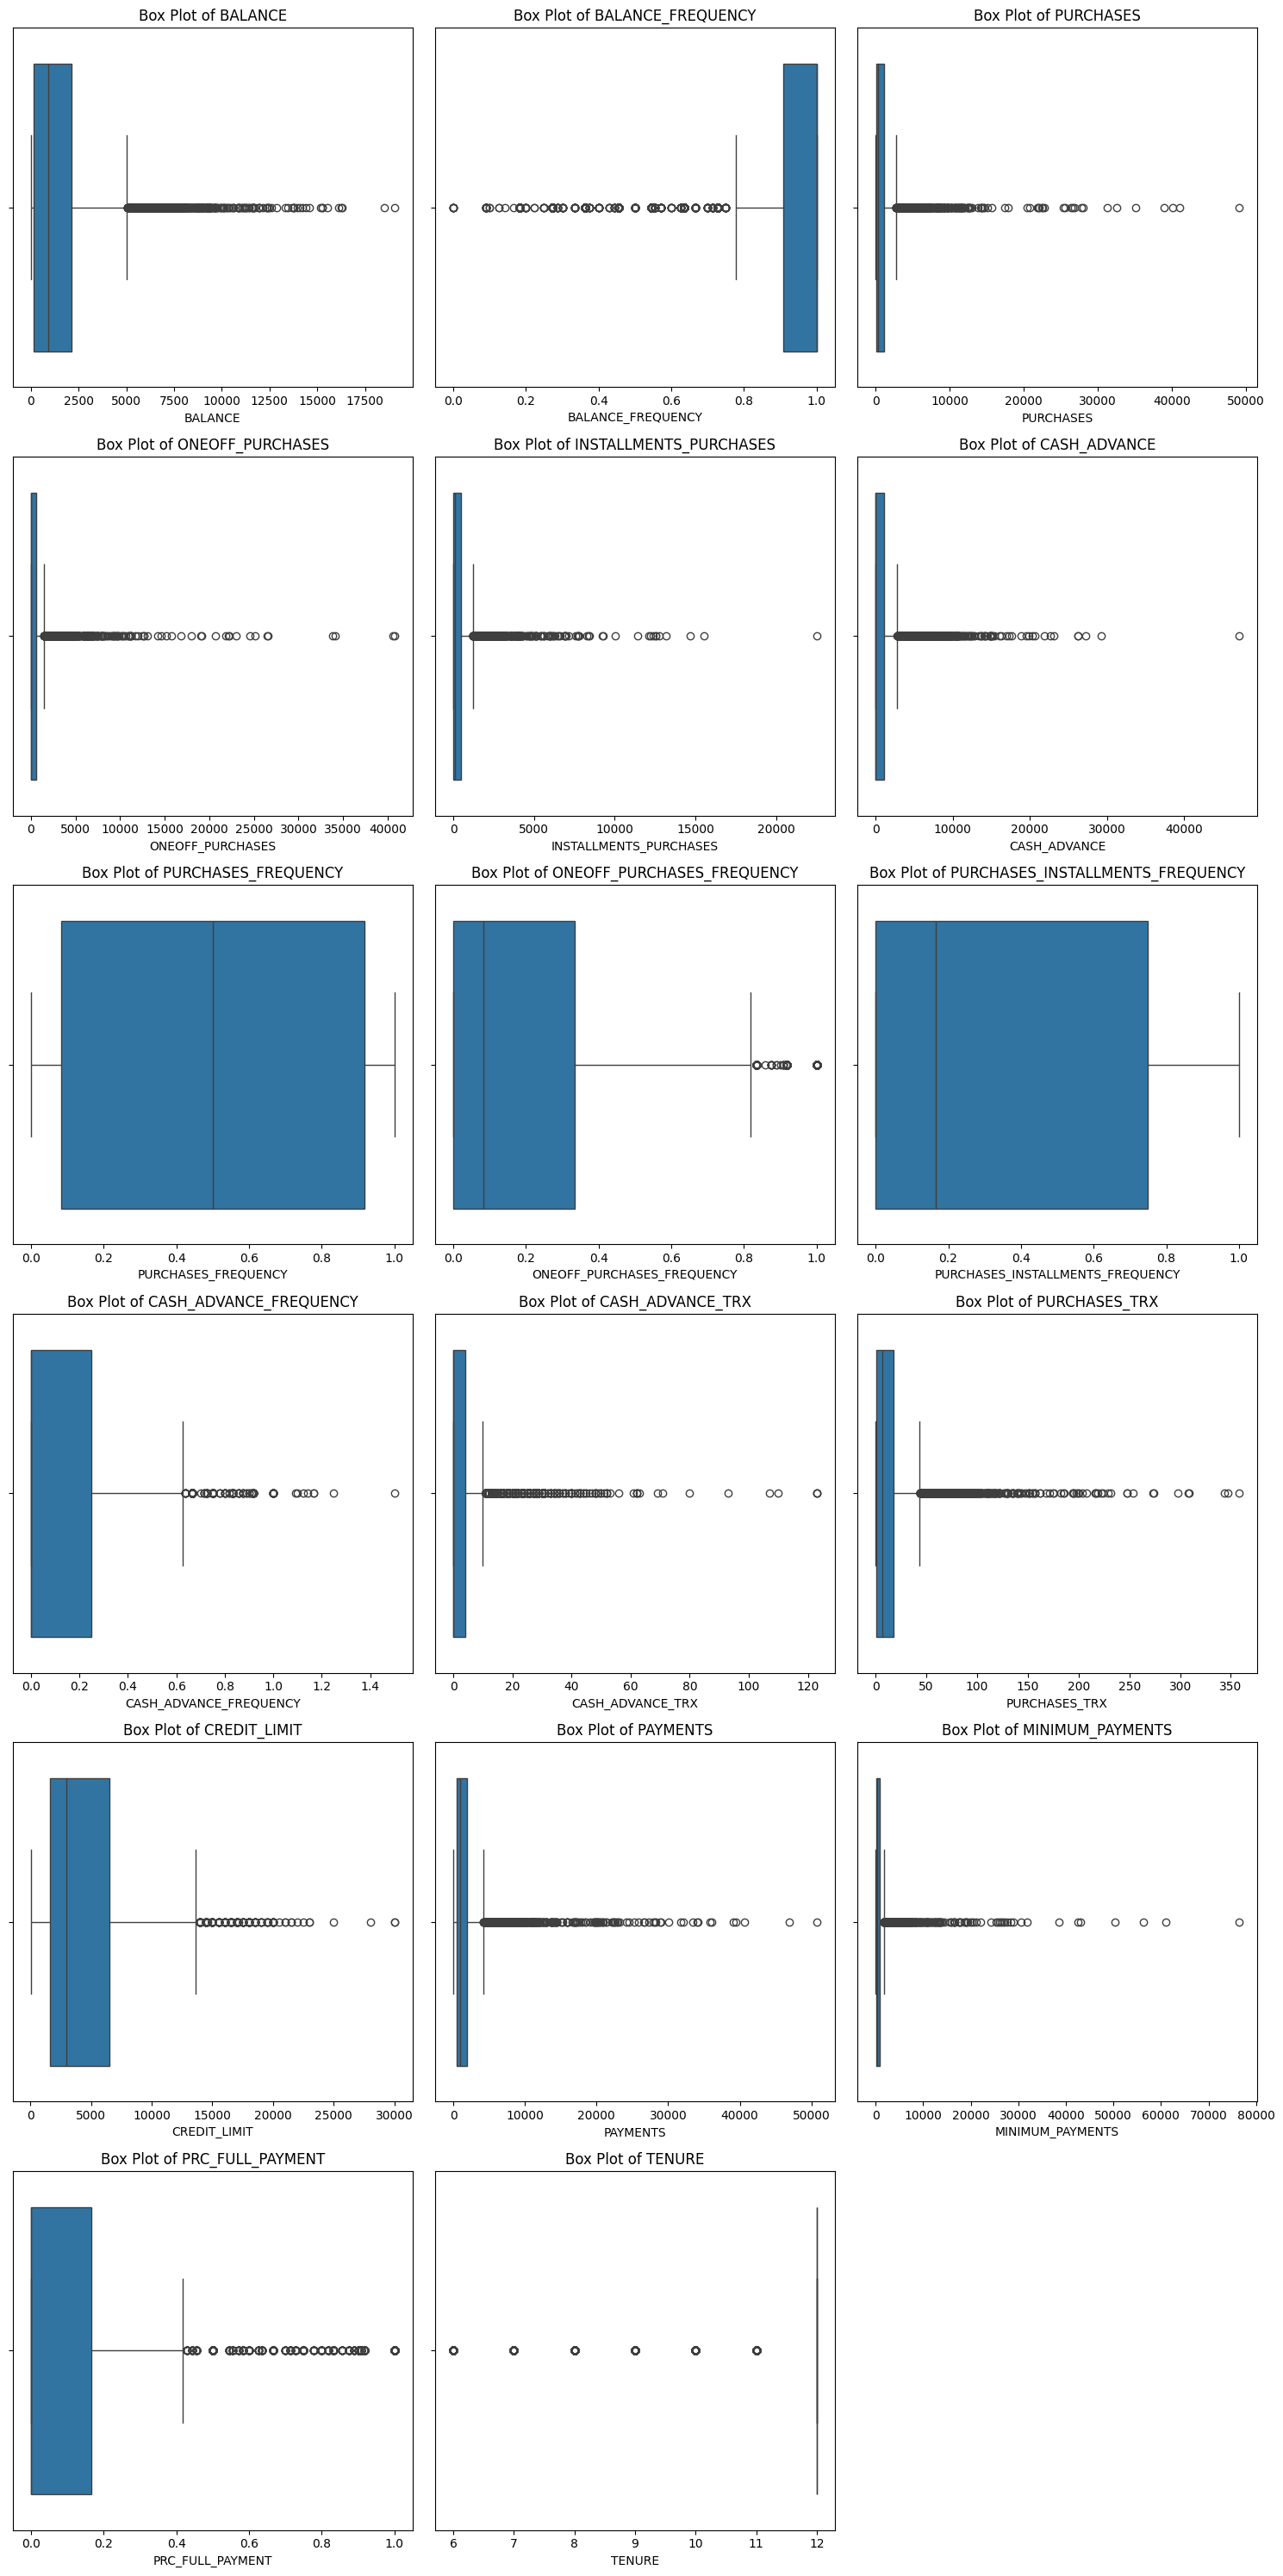

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['number']).columns

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.tight_layout()

plt.savefig('numeric_columns_boxplots.png')

plt.show()

Presence of Outliers:

Almost all variables, particularly BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PAYMENTS, and MINIMUM_PAYMENTS, show numerous outliers.
These outliers are represented by dots outside the whiskers and indicate that some customers have exceptionally high values for these variables, much higher than most other customers.
Skewness in Data:

The right-skewed distributions observed in the histograms are also visible here. Many variables have a long upper whisker and numerous outliers on the high end, reinforcing the presence of skewness.
Examples include CASH_ADVANCE, PURCHASES, CREDIT_LIMIT, and PAYMENTS, where most of the data is clustered towards lower values, with a few high-value outliers stretching the distribution.
Frequency Variables:

Variables like BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, and PURCHASES_INSTALLMENTS_FREQUENCY have box plots that are mostly contained within the range of 0 to 1.
This pattern suggests these variables represent proportions or frequencies, with values concentrated around specific points (often near 1 for high-frequency activities).
Consistent Tenure:

The TENURE variable shows no outliers and limited spread, with most values around 12. This indicates that most customers have been active for a similar period, possibly due to the dataset capturing activity over a limited or recent time frame.
Observations for Preprocessing:

Outliers: Since many variables have significant outliers, it may be necessary to handle these (e.g., using transformations or robust scaling) to prevent them from unduly influencing machine learning models.
Normalization/Scaling: Given the large range in values for many variables, scaling may be beneficial for model performance, particularly for algorithms sensitive to feature magnitudes.
In summary, these box plots provide insights into data spread, the presence of outliers, and skewness, which are critical for informing preprocessing steps. Addressing outliers and scaling these features will help improve the dataset’s suitability for machine learning applications.

df.corr() computes the correlation matrix for all numerical features in the DataFrame df. Each value in this matrix represents the correlation coefficient between two features, indicating how strongly they are linearly related (with values ranging from -1 to 1).

In [ ]:
corr = df.corr()

np.ones_like(corr, dtype=bool) creates a matrix of the same shape as corr, filled with True values.

np.triu(...) then converts this matrix into an "upper triangular" form, keeping only the upper triangle of the matrix as True and setting all values below the diagonal to False.

This mask is often used in visualization (e.g., with a heatmap) to hide the lower triangle of the correlation matrix, as it’s typically symmetrical across the diagonal.

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

# **Explanation of the Heatmap**

A correlation heatmap is a graphical representation of the correlation matrix, where each cell in the matrix displays the correlation coefficient between two variables. In this heatmap, colors represent the strength and direction of the correlation:

Red shades indicate positive correlations (as one variable increases, the other tends to increase as well).

Blue shades indicate negative correlations (as one variable increases, the other tends to decrease).

Intensity of color shows the strength of the correlation: darker colors imply stronger correlations, whether positive or negative.

Cells are masked to show only the upper triangle, given the matrix is symmetric around the diagonal.

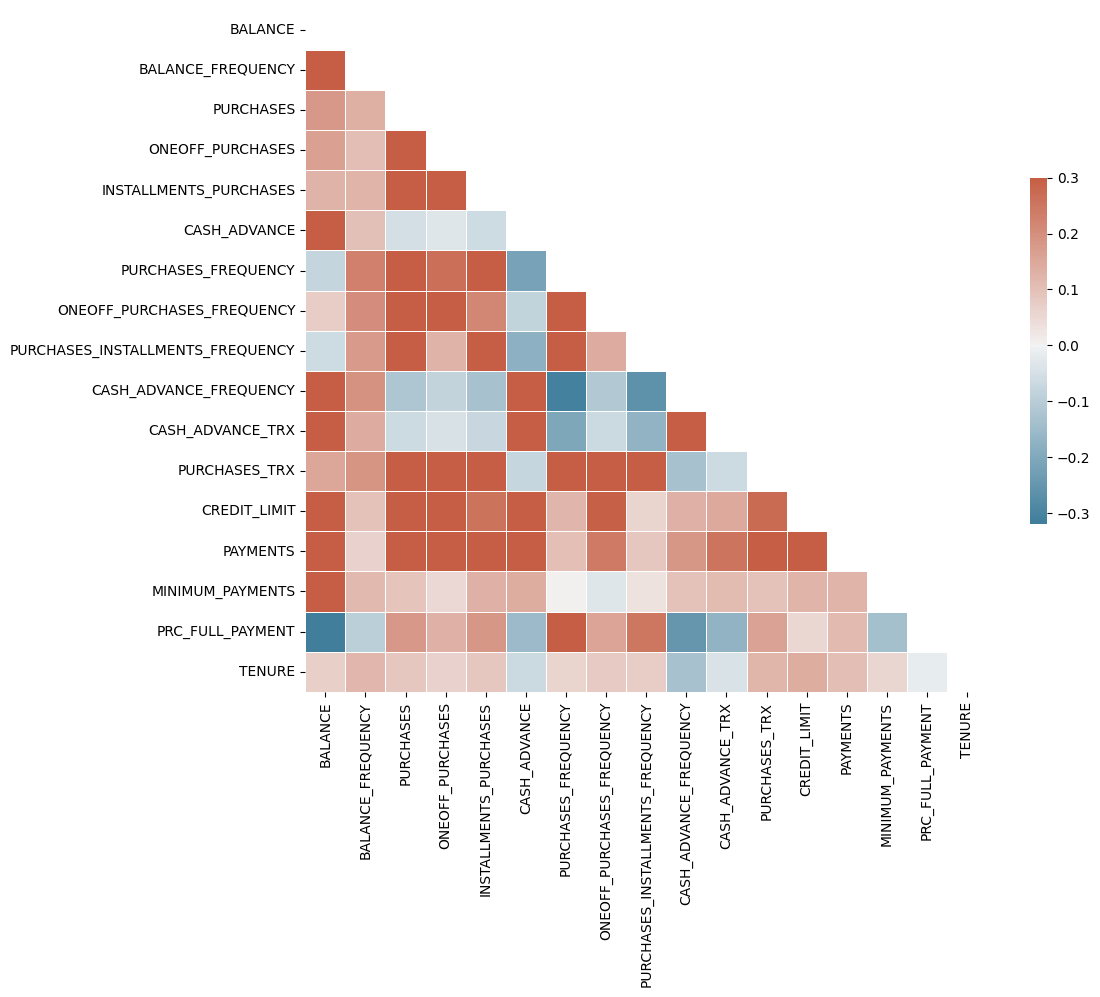

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

# **Analysis of the Heatmap**

Looking at your heatmap, several observations can be made:

1. **Positive Correlations:**

   Some features show a moderate positive correlation (e.g., between BALANCE and PURCHASES), suggesting that customers with higher balances also tend to make more purchases.
   
   PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY are positively correlated, which makes sense since frequent purchases often involve
   installment transactions.

2. **Negative Correlations:**

   Some features display weak to moderate negative correlations, but overall, there are fewer strongly negative correlations in this dataset.
   
   For example, PRC_FULL_PAYMENT (percentage of full payments) has a slight negative correlation with BALANCE, suggesting that customers who make full payments tend to have lower balances.

3. **Low or No Correlation:**

   Many feature pairs show weak or no correlation (closer to 0, seen in lighter shades), indicating limited linear relationship between those variables. This is common in customer behavior data, where various factors may be independent.

**Implications for Clustering**

For clustering, high correlation between variables can sometimes introduce redundancy, where multiple features convey similar information. You may consider dimensionality reduction techniques (like PCA) or select representative features if there are strong correlations within clusters of variables. Alternatively, clustering methods such as KMeans or Hierarchical Clustering can still work well but may benefit from standardized or reduced feature sets based on these correlations.

**What is an Outlier?**

An outlier is an observation that significantly differs from other data points in a dataset. Outliers can occur for various reasons, such as data entry errors, measurement errors, or natural variability in data. Detecting and handling outliers is essential as they can affect statistical analyses and model performance, especially in machine learning tasks.

**Explanation of the code :**

This function, detect_outliers, identifies outliers in a DataFrame df based on a specified feature (column) and a chosen method. Outliers are data points that differ significantly from other observations, often lying outside the expected range. Detecting and handling outliers is an essential part of data preprocessing, as they can skew analyses and impact the performance of machine learning models.

The function allows three different methods for detecting outliers:

1. **Interquartile Range (IQR) Method:**

   Explanation: This method calculates the Interquartile Range (IQR), which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data.

   Any values lying outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] are flagged as outliers. This factor (1.5 by default) can be customized using kwargs.

   This method is commonly used to detect outliers in continuous numerical data, especially when the data is approximately normally distributed.

2. **Threshold Method:**

   Explanation: This method flags outliers based on specified minimum (min_val) and maximum (max_val) thresholds.

   The min and max values can be set through kwargs to define acceptable limits for the feature. Any values outside these limits are considered outliers.
   
   This method is useful when you have domain-specific knowledge about the acceptable range of values for a feature.

3. **Frequency Method:**

   Explanation: This method considers outliers as values that appear infrequently in categorical or discrete data.

   It counts the frequency of each unique value in the feature. Any values with a frequency below a specified min_count (default is 5) are flagged as outliers.

   This method is helpful for categorical features or discrete numerical data where rare occurrences might indicate unusual cases.

4. **Error Handling for Unknown Methods:**

   This part raises an error if the method specified does not match any of the recognized options ('IQR', 'threshold', or 'frequency').

In [ ]:
def detect_outliers(df, feature, method, **kwargs):
    if method == 'IQR':
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - kwargs.get('factor', 1.5) * IQR
        upper_bound = Q3 + kwargs.get('factor', 1.5) * IQR
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    elif method == 'threshold':
        min_val = kwargs.get('min', -np.inf)
        max_val = kwargs.get('max', np.inf)
        outliers = df[(df[feature] < min_val) | (df[feature] > max_val)]

    elif method == 'frequency':
        freq = df[feature].value_counts()
        infrequent_values = freq[freq < kwargs.get('min_count', 5)].index
        outliers = df[df[feature].isin(infrequent_values)]

    else:
        raise ValueError(f"Unknown method {method}")

    return outliers

# **K_Means**

numpy: Used for numerical operations.

matplotlib.pyplot: Used to plot the clusters and centroids.

scipy.spatial.distance.cdist: Calculates the Euclidean distance between points in the dataset and centroids, which is essential for assigning clusters in KMeans.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [ ]:
final_df = df.copy()

Purpose: This function selects k random points from the dataset X to serve as the initial centroids.

Explanation:

X.shape[0] gives the number of rows in X (i.e., the number of data points).

np.random.choice randomly selects k indices without replacement.

X[random_indices, :] retrieves the data points at these indices to be used as the initial centroids.

In [ ]:
def initialize_centroids(X, k):

    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[random_indices, :]
    return centroids

Purpose: Assigns each data point in X to the nearest centroid.

Explanation:

cdist(X, centroids, 'euclidean') calculates the Euclidean distance between each point in X and each centroid.

np.argmin(distances, axis=1) finds the index of the nearest centroid for each point, effectively assigning a cluster label.

In [ ]:
def assign_clusters(X, centroids):

    distances = cdist(X, centroids, 'euclidean')
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels

Purpose: Recalculates the centroid of each cluster based on the current assignments.

Explanation:

new_centroids = np.zeros((k, X.shape[1])) initializes an array to store the new centroids.

The loop iterates over each cluster, selects the points assigned to that cluster (X[cluster_labels == cluster]), and calculates the mean to update the centroid.

If a cluster has no points (rare), it skips the update for that centroid.

In [ ]:
def update_centroids(X, cluster_labels, k):

    new_centroids = np.zeros((k, X.shape[1]))
    for cluster in range(k):
        cluster_points = X[cluster_labels == cluster]
        if len(cluster_points) > 0:
            new_centroids[cluster] = np.mean(cluster_points, axis=0)
    return new_centroids

Purpose: Implements the complete KMeans algorithm.

Explanation:

initialize_centroids(X, k) initializes centroids.

For up to max_iters iterations:

It assigns each data point to the nearest centroid.

Updates the centroids based on current assignments.

Calculates the shift in centroids (centroid_shift) to check for convergence.

If the centroid shift is less than the tolerance tol, it breaks out of the loop, signaling convergence.

Returns the final centroids and cluster labels.

In [ ]:
def kmeans(X, k, max_iters=100, tol=1e-4):


    centroids = initialize_centroids(X, k)

    for i in range(max_iters):

        cluster_labels = assign_clusters(X, centroids)

        new_centroids = update_centroids(X, cluster_labels, k)

        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift < tol:
            print(f"Converged after {i+1} iterations.")
            break

        centroids = new_centroids

    return centroids, cluster_labels

KMeans: The K-Means clustering algorithm from sklearn.cluster.

silhouette_score: A metric from sklearn.metrics that calculates how well-separated the clusters are, with higher scores indicating better-defined clusters.

numpy: Provides support for numerical operations.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

Purpose: Defines the parameter grid for the grid search, listing all possible values for each K-Means parameter.

1. n_clusters: Specifies the number of clusters to evaluate, ranging from 2 to 10.

2. init: The initialization method for centroids, with options for 'k-means++' (optimized initialization) and 'random'.

3. max_iter: The maximum number of iterations for each run, set to test values of 100 and 300.

4. tol: The tolerance level for convergence; smaller values mean tighter convergence criteria.

In [ ]:
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}


best_score: Initializes with -1 to store the highest silhouette score found.

best_params: An empty dictionary to store the best combination of parameters when a new best score is found.

In [ ]:
best_score = -1
best_params = {}

Purpose: These nested loops iterate over every combination of parameters specified in param_grid.

1. For each combination, a KMeans instance is created with the current values of n_clusters, init, max_iter, and tol.

2. fit_predict(final_df): Fits K-Means on final_df and returns the cluster labels for each data point in the dataset.

Purpose: Calculates the silhouette score for the current clustering solution to evaluate how well-separated the clusters are.

1. silhouette_score(final_df, labels): Uses final_df and the cluster labels (labels) to compute the score.

2. Higher scores indicate better-defined clusters.

Purpose: Compares the current silhouette score with the best score found so far.

1. if score > best_score: If the current score is higher, update best_score and best_params.

2. best_score: Stores the highest silhouette score.

3. best_params: Updates with the best-performing parameters based on the current best score.

In [ ]:
for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for max_iter in param_grid['max_iter']:
            for tol in param_grid['tol']:

                kmeans_grid = KMeans(n_clusters=n_clusters, init=init, max_iter=max_iter, tol=tol, random_state=42)
                labels = kmeans_grid.fit_predict(final_df)


                score = silhouette_score(final_df, labels)


                if score > best_score:
                    best_score = score
                    best_params = {
                        'n_clusters': n_clusters,
                        'init': init,
                        'max_iter': max_iter,
                        'tol': tol
                    }


Purpose: Outputs the best parameters and corresponding silhouette score.

best_params: Contains the optimal parameters for n_clusters, init, max_iter, and tol.

best_score: Displays the highest silhouette score achieved.

In [ ]:
print("Best parameters found:", best_params)
print("Best silhouette score:", best_score)

Best parameters found: {'n_clusters': 2, 'init': 'k-means++', 'max_iter': 100, 'tol': 0.01}
Best silhouette score: 0.5211738706228236


Purpose: Visualizes the clusters along with the centroids.

Explanation:

A new figure is created, with different colors for each cluster.

plt.scatter is used to plot data points of each cluster in different colors.

The centroids are marked with a black "X".

Labels, titles, and legends are added to make the plot informative.

In [ ]:
def plot_clusters(X, cluster_labels, centroids):

    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(cluster_labels)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']

    for label in unique_labels:
        cluster_points = X[cluster_labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[label], label=f'Cluster {label}')

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(f"KMeans Clustering (k = {len(centroids)})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

Purpose: Prints the data types of each column in final_df.

Explanation: This helps confirm that all columns are numeric before proceeding with clustering, as KMeans requires numerical data.

In [ ]:
print(final_df.dtypes)


BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


Purpose: Creates a new DataFrame final_df_numeric containing only numeric columns from final_df.

Explanation: Non-numeric columns are excluded to ensure the input to KMeans is suitable.

In [ ]:
final_df_numeric = final_df.select_dtypes(include=[np.number])


Purpose: Converts the numeric DataFrame to a NumPy array.

Explanation: KMeans expects input data in array form, so this step prepares X for clustering.

In [ ]:
X = final_df_numeric.to_numpy()


Purpose: Sets k (number of clusters), runs the KMeans algorithm, and visualizes the clusters.

Explanation:

kmeans(X, k) performs clustering with k clusters, returning centroids and cluster labels.

plot_clusters(X, cluster_labels, centroids) generates a plot of the clustered data and centroids.

Converged after 41 iterations.


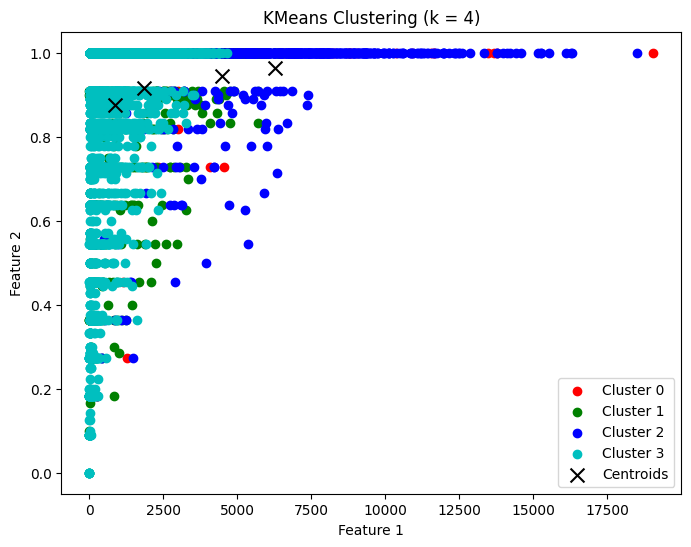

In [ ]:
k = 4
centroids, cluster_labels = kmeans(X, k)

plot_clusters(X, cluster_labels, centroids)

**Inertia Calculation (calculate_inertia function):**

Loops over each cluster.

Retrieves all points assigned to the current cluster.

Calculates the sum of squared distances between each point in the cluster and the centroid, and adds this to the total inertia.

The result, inertia, provides a measure of how tightly grouped the clusters are.

**Silhouette Score:**

Uses silhouette_score from sklearn.metrics, which computes the mean Silhouette Score across all samples.

 This function automatically calculates the distances needed to assess how well each point fits within its cluster compared to other clusters.

In [ ]:
from sklearn.metrics import silhouette_score

def calculate_inertia(X, centroids, cluster_labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[cluster_labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


k = 4
centroids, cluster_labels = kmeans(X, k)

inertia = calculate_inertia(X, centroids, cluster_labels)
print(f"Inertia for k={k}: {inertia}")




Converged after 34 iterations.
Inertia for k=4: 203503808206.69205


1. **Define the Range for k:**

   max_k specifies the maximum number of clusters to consider. This example uses values from 1 to 10.

2. **Loop over Each k Value:**

   For each value of k, the KMeans algorithm is run using your kmeans function.

   The calculate_inertia function (defined in the previous step) calculates the inertia for each clustering result.

   The inertia for each k is stored in the inertias list.

3. **Plot the Results:**

   A line plot is created with k values on the x-axis and inertia on the y-axis.

   The "elbow" in the plot (where inertia begins to decrease more slowly) can indicate the optimal k.

Running this code will display the elbow plot, helping you identify an appropriate number of clusters for your data.

Converged after 2 iterations.
Converged after 18 iterations.
Converged after 31 iterations.
Converged after 43 iterations.
Converged after 23 iterations.
Converged after 50 iterations.
Converged after 56 iterations.
Converged after 39 iterations.
Converged after 32 iterations.


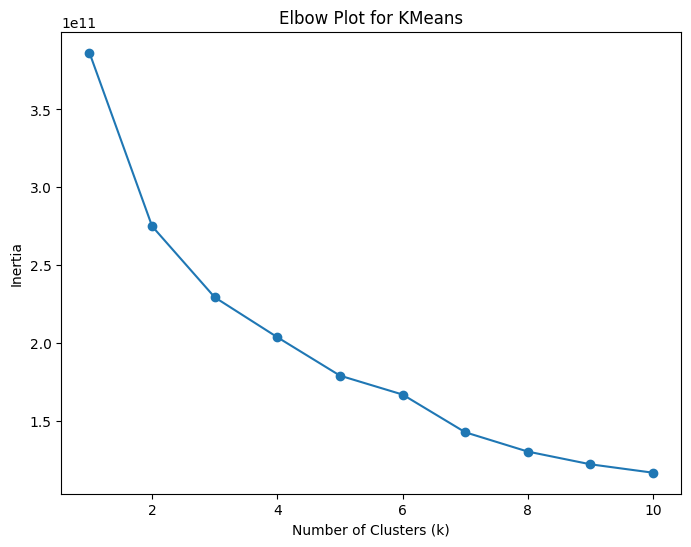

In [ ]:
import matplotlib.pyplot as plt

def elbow_plot(X, max_k=10):
    inertias = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        centroids, cluster_labels = kmeans(X, k)
        inertia = calculate_inertia(X, centroids, cluster_labels)
        inertias.append(inertia)


    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertias, marker='o')
    plt.title("Elbow Plot for KMeans")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.show()

elbow_plot(X, max_k=10)


# **K_Medoid**

K-Medoids is a clustering algorithm similar to K-Means but with a key difference in how cluster centers are determined, making it more robust to outliers. Instead of using the mean of the points in a cluster as the center (like K-Means does), K-Medoids uses actual data points from the dataset, known as medoids, to represent each cluster center. This approach helps to reduce the impact of outliers, as extreme values do not influence the medoid as they would the mean.

numpy: Provides support for numerical operations and array manipulations.

matplotlib.pyplot: Useful for plotting, although not used in this code block, it can be used later for visualizing clusters.

silhouette_score (from sklearn.metrics): Calculates the silhouette score, a metric that measures the quality of clusters.

cdist (from scipy.spatial.distance): Computes distances between each pair of points in two collections, which is used here to calculate Euclidean distances between data points and medoids.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


Purpose: This function randomly selects initial medoids from the dataset X.

**Explanation:**

   1. np.random.choice(X.shape[0], size=k, replace=False) randomly selects k indices from the dataset without replacement. This ensures that the initial medoids are distinct data points.

   2. X[random_indices, :] retrieves the data points corresponding to these indices and assigns them as the initial medoids.

Return: Returns a matrix medoids containing k randomly selected points from X to act as the initial medoids.

In [ ]:
def initialize_medoids(X, k):
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    medoids = X[random_indices, :]
    return medoids


Purpose: This function assigns each data point in X to the nearest medoid.

**Explanation:**

1. cdist(X, medoids, 'euclidean') computes the Euclidean distance between each point in X and each medoid, resulting in a distance matrix where each row corresponds to a data point and each column to a medoid.

2. np.argmin(distances, axis=1) finds the index of the nearest medoid (the one with the smallest distance) for each data point, effectively assigning a cluster label to each point.

Return: Returns cluster_labels, a 1D array where each entry represents the cluster assignment of the corresponding data point in X.

In [ ]:
def assign_clusters(X, medoids):
    distances = cdist(X, medoids, 'euclidean')
    cluster_labels = np.argmin(distances, axis=1)
    return cluster_labels


Purpose: Updates the medoids by selecting a new medoid for each cluster, aiming to minimize the distance within each cluster.

**Explanation:**

1. new_medoids = np.zeros((k, X.shape[1])) initializes a new array to store the updated medoids.

2. The loop iterates over each cluster (from 0 to k−1).

3. cluster_points = X[cluster_labels == cluster] selects all points in the current cluster.

**For each cluster:**
1. cdist(cluster_points, cluster_points, 'euclidean') calculates the pairwise distances between points in the cluster.

2. np.sum(..., axis=1) sums these distances for each point in the cluster.

3. np.argmin(...) identifies the point with the smallest total distance to all other points in the cluster, making it the new medoid.

If a cluster has no points, it skips updating the medoid for that cluster.

Return Value: Returns an array of updated medoids.

In [ ]:
def update_medoids(X, cluster_labels, k):
    new_medoids = np.zeros((k, X.shape[1]))
    for cluster in range(k):
        cluster_points = X[cluster_labels == cluster]
        if len(cluster_points) > 0:
            medoid_index = np.argmin(np.sum(cdist(cluster_points, cluster_points, 'euclidean'), axis=1))
            new_medoids[cluster] = cluster_points[medoid_index]
    return new_medoids


Purpose: Implements the K-Medoids algorithm, iterating until convergence or reaching the maximum number of iterations.

**Explanation:**

1. Initialization: medoids = initialize_medoids(X, k) randomly initializes the medoids using the initialize_medoids function.

2. Iteration:

  1. For each iteration:

  1. Assign Clusters: assign_clusters(X, medoids) assigns each point in X to the nearest medoid, returning cluster_labels.

   2. Update Medoids: update_medoids(X, cluster_labels, k) updates the medoids based on the current cluster assignments.

  3. Medoid Shift: np.linalg.norm(new_medoids - medoids) calculates the Euclidean distance (shift) between the old and new medoids. This shift is used to check for convergence.

  4. Convergence Check: If medoid_shift is less than tol (a small threshold), the algorithm has converged, and the loop breaks early. A message is printed indicating the number of iterations taken to converge.

If the medoids continue shifting, the loop continues until reaching max_iters.

Return Value: Returns the final medoids and cluster labels.


In [ ]:
def k_medoids(X, k, max_iters=100, tol=1e-4):
    medoids = initialize_medoids(X, k)
    for i in range(max_iters):
        cluster_labels = assign_clusters(X, medoids)
        new_medoids = update_medoids(X, cluster_labels, k)

        medoid_shift = np.linalg.norm(new_medoids - medoids)
        if medoid_shift < tol:
            print(f"Converged after {i+1} iterations.")
            break
        medoids = new_medoids

    return medoids, cluster_labels


In [ ]:
! pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.9 MB/s eta 0:00:00


In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
import numpy as np

**Explanation of param_grid_kmedoids :**

The param_grid_kmedoids is a dictionary that defines a set of hyperparameters for tuning the K-Medoids clustering algorithm. It allows you to explore different configurations of the algorithm to find the optimal clustering performance for your dataset. Each key in the dictionary corresponds to a specific parameter of the KMedoids implementation, and its values are the potential options for that parameter.

Here’s a detailed breakdown of the parameters:

1. **n_clusters**

  Definition: Specifies the number of clusters to form.

  Values: [2, 4, 6]

  Testing 2, 4, and 6 clusters to find the most suitable grouping for your data.
  
  Why Important: The correct number of clusters depends on the dataset structure. Testing different values allows you to identify the configuration that maximizes cluster separation (e.g., using silhouette score).

2. **metric**

  Definition: Determines the distance metric used to compute dissimilarity between points.
  
  Values: ['euclidean', 'manhattan']
  
  Euclidean: Standard straight-line distance (default for many clustering algorithms).

  Manhattan: Sum of absolute differences, better for high-dimensional or grid-like data.

  Why Important: Different datasets might have features better suited to
  specific distance metrics. Testing both ensures the best fit for your data.

3. **init**
  
  Definition: Initialization strategy for selecting the initial medoids.
  
  Values: ['k-medoids++', 'random']
  
  k-medoids++: Chooses initial medoids to speed up convergence and improve clustering quality.
  
  random: Randomly selects initial medoids.
  
  Why Important: Initialization can significantly affect clustering outcomes. Using k-medoids++ often results in better clusters, but testing random ensures robustness.

4. **max_iter**
  
  Definition: Maximum number of iterations allowed for the algorithm to converge.
  
  Values: [100, 200]
  
  Testing 100 and 200 iterations to balance computational cost and convergence accuracy.
  
  Why Important: Ensures that the algorithm has sufficient iterations to refine clusters without excessive computation.

5. **method**
  
  Definition: Specifies the algorithm used to update medoids during clustering.
  
  Values: ['pam', 'alternate']
  
  pam (Partitioning Around Medoids): Traditional and robust medoid selection algorithm.
  
  alternate: Faster alternative for large datasets.
  
  Why Important: The choice between pam and alternate affects both computational efficiency and clustering quality, depending on the dataset size and complexity.


In [ ]:
param_grid_kmedoids = {
    'n_clusters': [2, 4, 6],
    'metric': ['euclidean', 'manhattan'],
    'init': ['k-medoids++', 'random'],
    'max_iter': [100, 200],
    'method': ['pam', 'alternate']
}


The variables best_score and best_params_ are used to track the best-performing configuration of a clustering algorithm during hyperparameter tuning. They serve as placeholders to store the highest score achieved and the corresponding hyperparameters.

In [ ]:
best_score = -1
best_params_ = {}

**Explanation of K-Medoids Hyperparameter Tuning Code**

This code implements a grid search approach to tune the hyperparameters of the K-Medoids clustering algorithm. It iterates through all possible combinations of parameters defined in the param_grid_kmedoids dictionary and evaluates their performance based on the silhouette score. The goal is to identify the combination of hyperparameters that yields the best clustering results.

1. **Nested Loops for Grid Search**

  Purpose:

  Iterates over all possible combinations of hyperparameters defined in param_grid_kmedoids.

2. **Model Creation**
  
  Purpose:
  
  Creates a new KMedoids model for each combination of hyperparameters.

  The random_state ensures reproducibility of results.
  
  This model will be fit to the data in the next steps.

3. **Fitting and Predicting**

  Purpose:
  
  Fits the KMedoids model on the dataset (final_df) and predicts the cluster labels for each data point.

  labels: The cluster assignments for each data point.

4. **Handling Empty Clusters**

  Purpose:

  Ensures that all clusters contain at least one data point. If any cluster is empty, the current configuration is skipped.

  unique_labels: Set of unique cluster labels.
  
  cluster_sizes: List of data points in each cluster.

5. **Evaluating the Clustering Performance**

  Purpose:

  Computes the silhouette score for the current clustering configuration. This score measures how well-separated the clusters are (higher is better).

  Condition: Silhouette score is only meaningful if there are at least two clusters.

6. **Updating the Best Configuration**

  Purpose:

  Tracks the best hyperparameter combination based on the highest silhouette score.

In [ ]:

for n_clusters in param_grid_kmedoids['n_clusters']:
    for metric in param_grid_kmedoids['metric']:
        for init in param_grid_kmedoids['init']:
            for max_iter in param_grid_kmedoids['max_iter']:
                for method in param_grid_kmedoids['method']:


                    kmedoid_grid = KMedoids(
                        n_clusters=n_clusters,
                        metric=metric,
                        init=init,
                        max_iter=max_iter,
                        method=method,
                        random_state=42
                    )


                    labels = kmedoid_grid.fit_predict(final_df)


                    unique_labels = set(labels)
                    cluster_sizes = [list(labels).count(label) for label in unique_labels]


                    if any(size == 0 for size in cluster_sizes):
                        continue


                    if len(unique_labels) > 1:
                        score = silhouette_score(final_df, labels)


                        if score > best_score:
                            best_score = score
                            best_params = {
                                'n_clusters': n_clusters,
                                'metric': metric,
                                'init': init,
                                'max_iter': max_iter,
                                'method': method
                            }




Best Score: 0.4617378272143298
Best Parameters: {'n_clusters': 2, 'metric': 'manhattan', 'init': 'k-medoids++', 'max_iter': 100, 'method': 'alternate'}


After completing the grid search, the code prints the best silhouette score and the corresponding hyperparameters:

best_score: Highest silhouette score achieved.

best_params: Dictionary containing the optimal hyperparameter configuration.

In [ ]:
print("Best parameters found:", best_params)
print("Best silhouette score:", best_score)

Best parameters found: {'n_clusters': 2, 'metric': 'manhattan', 'init': 'k-medoids++', 'max_iter': 100, 'method': 'alternate'}
Best silhouette score: 0.4617378272143298


**Calculate Inertia :**

In [ ]:
def calculate_inertia(X, medoids, cluster_labels):
    inertia = 0
    for i, medoid in enumerate(medoids):
        cluster_points = X[cluster_labels == i]
        inertia += np.sum((cluster_points - medoid) ** 2)
    return inertia


 **Elbow Plot :**

Converged after 2 iterations.
Converged after 3 iterations.
Converged after 3 iterations.
Converged after 7 iterations.
Converged after 4 iterations.
Converged after 4 iterations.
Converged after 3 iterations.
Converged after 6 iterations.
Converged after 6 iterations.
Converged after 5 iterations.


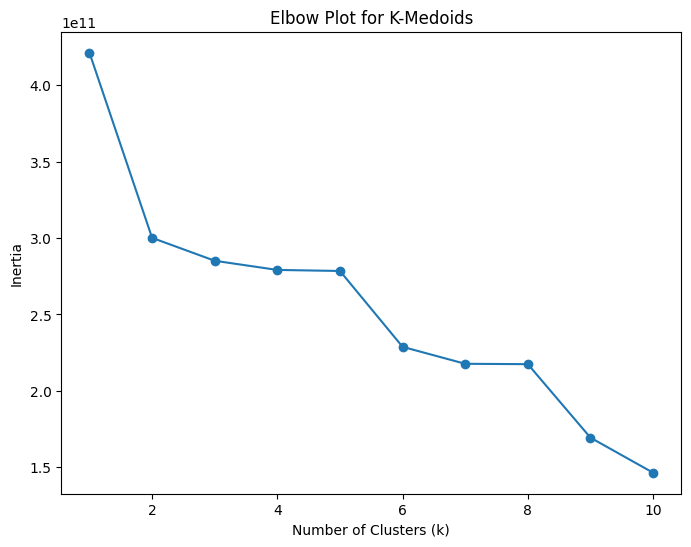

In [ ]:
def elbow_plot(X, max_k=10):
    inertias = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        medoids, cluster_labels = k_medoids(X, k)
        inertia = calculate_inertia(X, medoids, cluster_labels)
        inertias.append(inertia)


    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertias, marker='o')
    plt.title("Elbow Plot for K-Medoids")
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia")
    plt.show()

elbow_plot(X, max_k=10)


**Plotting Clusters and Medoids :**

In [ ]:
def plot_clusters(X, cluster_labels, medoids):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(cluster_labels)
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange']

    for label in unique_labels:
        cluster_points = X[cluster_labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[label % len(colors)], label=f'Cluster {label}')

    plt.scatter(medoids[:, 0], medoids[:, 1], color='black', marker='x', s=100, label='Medoids')
    plt.title(f"K-Medoids Clustering (k = {len(medoids)})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


After defining the functions, here’s how you can apply them to your dataset:

Converged after 5 iterations.
Inertia for k=4: 256534409881.51086
Best silhouette score: 0.5211738706228236


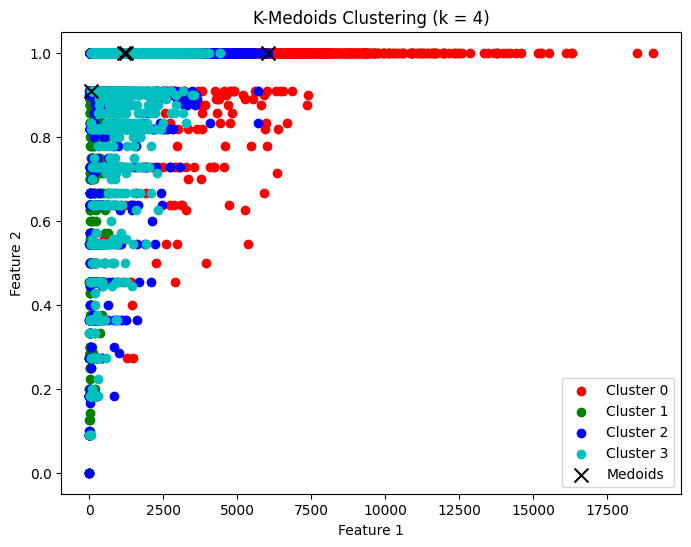

In [ ]:
k = 4
medoids, cluster_labels = k_medoids(X, k)

inertia = calculate_inertia(X, medoids, cluster_labels)
print(f"Inertia for k={k}: {inertia}")

print("Best silhouette score:", best_score)

plot_clusters(X, cluster_labels, medoids)



# **DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm that groups together points that are close to each other based on a distance metric, while identifying points in low-density regions as noise or outliers. DBSCAN is useful for datasets where clusters are of varying shapes and densities, and it does not require specifying the number of clusters in advance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


**dbscan Function**

The main function, dbscan, performs the DBSCAN clustering on a dataset X using two key parameters:

1. eps: The maximum distance between two points for them to be considered as neighbors.

2. min_samples: The minimum number of points required to form a dense region (i.e., a cluster).

n_points = X.shape[0]: Gets the number of points (rows) in the dataset X.

labels = np.full(n_points, -1): Initializes a labels array with -1 for each point, where -1 indicates a point is considered noise by default.

cluster_id = 0: Initializes the cluster_id, which increments each time a new cluster is created.


**region_query Helper Function**

Purpose: Finds all points within a distance of eps from the point at point_idx.

Explanation:

distances = np.linalg.norm(X - X[point_idx], axis=1): Calculates the Euclidean distance from point_idx to all other points in X.

np.where(distances <= eps)[0]: Returns the indices of points where the distance is less than or equal to eps, identifying the neighboring points within this radius.

**expand_cluster Helper Function**

Purpose: Expands a new cluster from a core point by adding all reachable points within eps that satisfy the density condition (min_samples).

Explanation:

labels[point_idx] = cluster_id: Assigns the current cluster_id to point_idx, marking it as part of the cluster.

while i < len(neighbors): Loops through all neighbors of point_idx.

if labels[neighbor_idx] == -1: If a neighbor was labeled as noise, it is reassigned to the current cluster.

new_neighbors = region_query(neighbor_idx): Finds neighbors of the current neighbor.

Density Condition: If a neighbor has enough points within its own neighborhood (>= min_samples), these neighbors are appended to the list of neighbors to be visited, effectively growing the cluster.

Loop Continuation: The i += 1 ensures that the while loop iterates through all neighbors.

**Main DBSCAN Loop**


Purpose: Iterates over each point to determine whether it belongs to a cluster or is noise.

Explanation:

if labels[point_idx] != -1: Checks if the point has already been processed (assigned to a cluster or labeled as noise).

neighbors = region_query(point_idx): Finds neighbors within eps distance.

Noise Check: If len(neighbors) < min_samples, the point remains labeled as noise (-1).

Cluster Expansion: If neighbors meets the density condition (min_samples), the expand_cluster function is called to form a new cluster, and cluster_id is incremented for the next potential cluster.


**Return**

Purpose: Returns the final labels array, where each point is labeled with
either:

-1 for noise, or

A unique cluster ID corresponding to the cluster it belongs to.


In [ ]:

def custom_dbscan(X, eps, min_samples):
    n_points = X.shape[0]
    labels = np.full(n_points, -1)
    cluster_id = 0


    def region_query(point_idx):

        distances = np.linalg.norm(X - X[point_idx], axis=1)

        return np.where(distances <= eps)[0]

    def expand_cluster(point_idx, neighbors):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
                new_neighbors = region_query(neighbor_idx)
                if len(new_neighbors) >= min_samples:
                    neighbors = np.append(neighbors, new_neighbors)
            i += 1


    for point_idx in range(n_points):
        if labels[point_idx] != -1:
            continue
        neighbors = region_query(point_idx)
        if len(neighbors) < min_samples:
            labels[point_idx] = -1
        else:
            expand_cluster(point_idx, neighbors)
            cluster_id += 1

    return labels


**Custom Inertia Calculation for DBSCAN :**

DBSCAN does not traditionally use inertia, as it’s not centroid-based. However, we can calculate a similar metric by summing the squared distances of each point to the centroid of its cluster.

In [ ]:
def calculate_dbscan_inertia(X, labels):
    unique_labels = set(labels)
    inertia = 0
    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = X[labels == label]
        centroid = np.mean(cluster_points, axis=0)
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


**Silhouette Score for DBSCAN :**

Since DBSCAN does not assign all points to clusters (some points are labeled as noise), only calculate the silhouette score on non-noise points.

In [ ]:
def dbscan_silhouette_score(X, labels):

    mask = labels != -1
    if np.sum(mask) == 0:
        return -1
    return silhouette_score(X[mask], labels[mask])


**Plot Clusters :**

Here’s code for plotting the clusters with noise points shown in a different color.

In [ ]:
def plot_dbscan_clusters(X, labels):
    unique_labels = set(labels)
    plt.figure(figsize=(8, 6))
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=col, label=f'Cluster {k}' if k != -1 else 'Noise')

    plt.title("DBSCAN Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


**Run DBSCAN and Evaluate Clustering**

Now that we have the DBSCAN clustering code, inertia calculation, silhouette score, and plot function, let’s run DBSCAN and evaluate the results.

and test the best eps and min samples

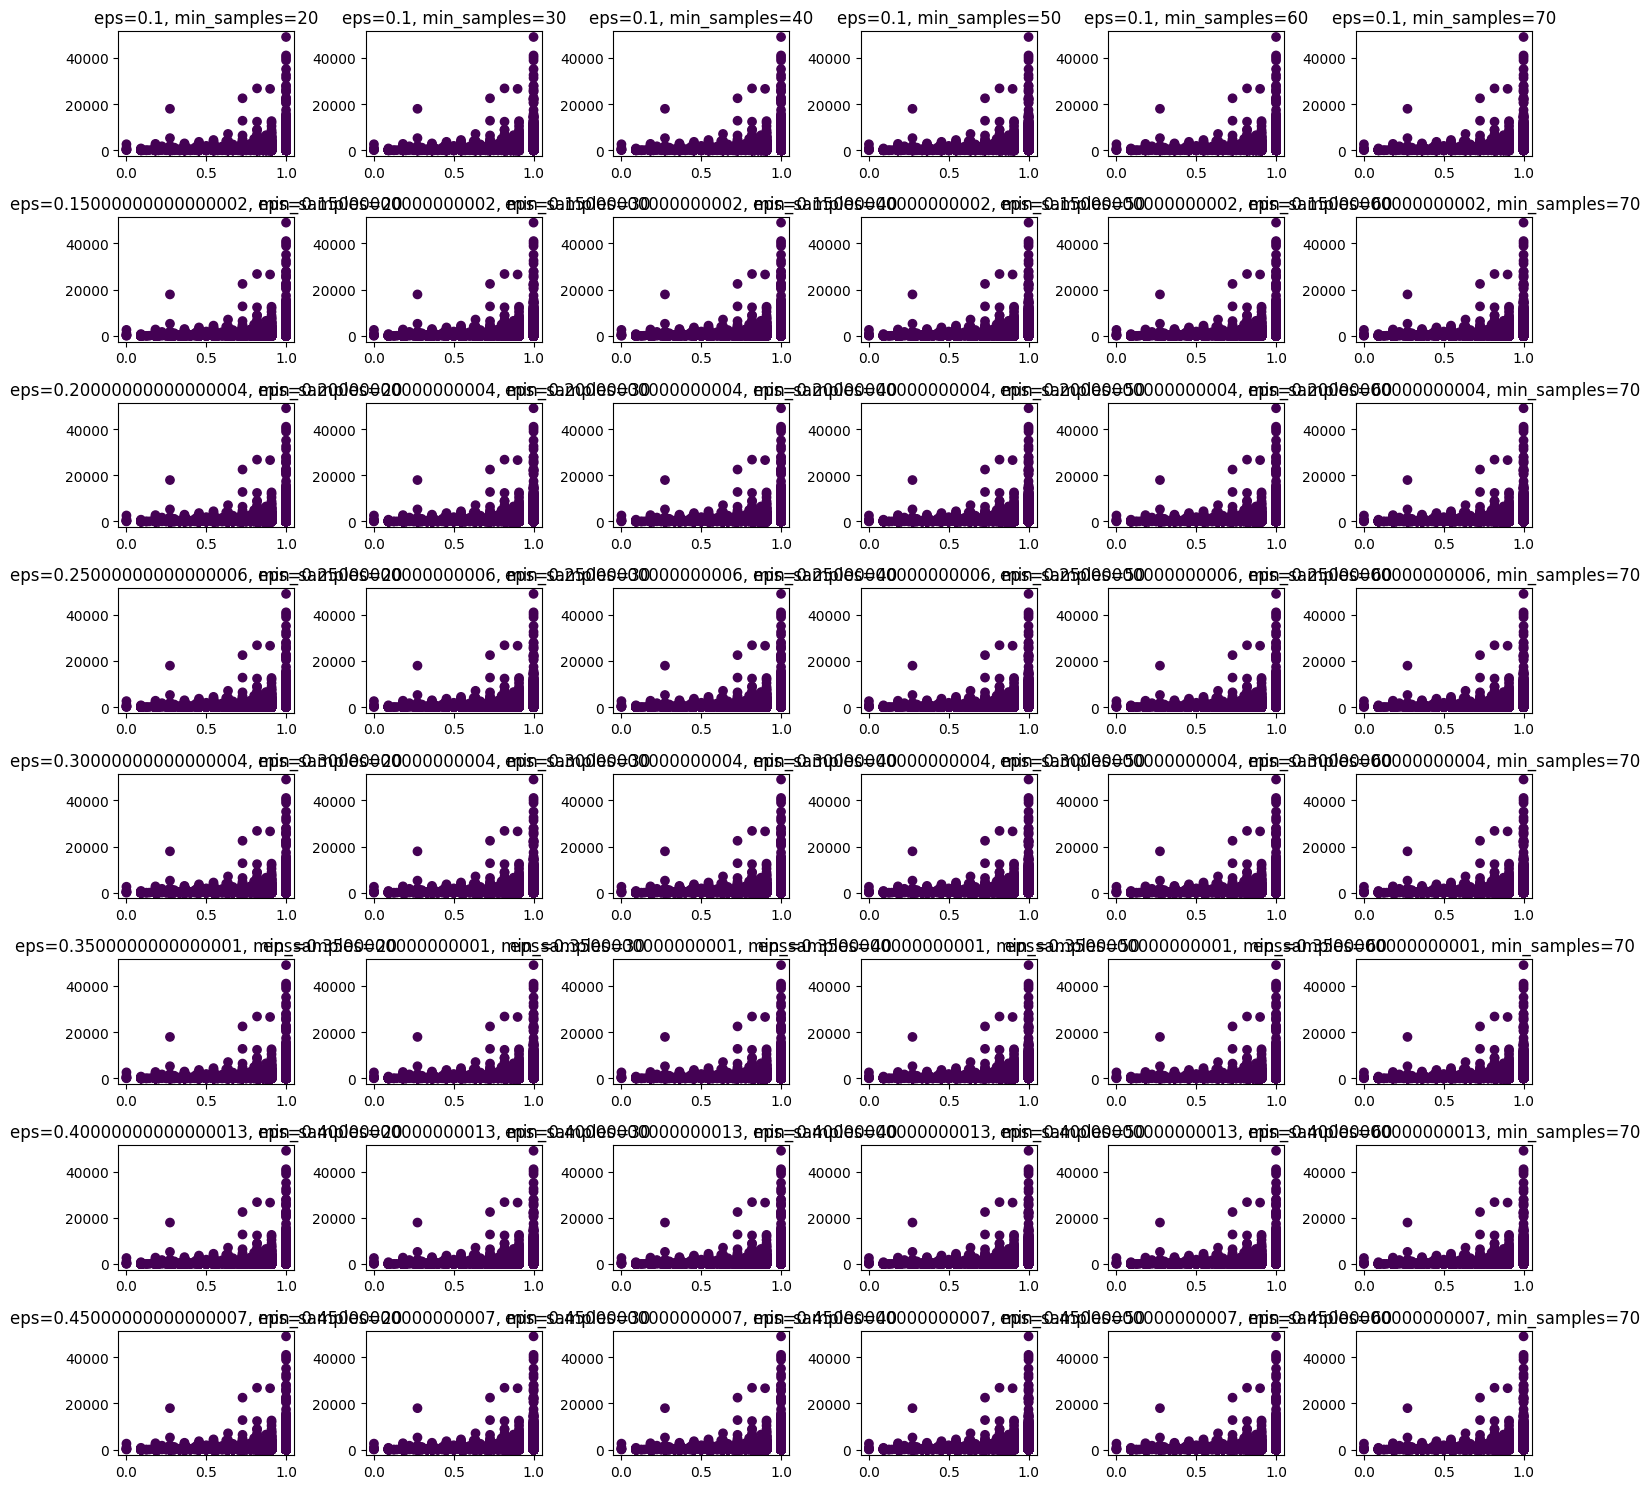

In [ ]:
from sklearn.cluster import DBSCAN


eps_values = np.arange(0.1, 0.5, 0.05)
min_samples_values = range(20, 80, 10)

fig, axs = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(final_df)
        labels = dbscan.labels_

        axs[i, j].scatter(df.iloc[:,1], df.iloc[:,2], c=labels)
        axs[i, j].set_title(f'eps={eps}, min_samples={min_samples}')

plt.tight_layout()
plt.show()

Inertia (DBSCAN): 0
Silhouette Score (DBSCAN): Not defined for a single cluster


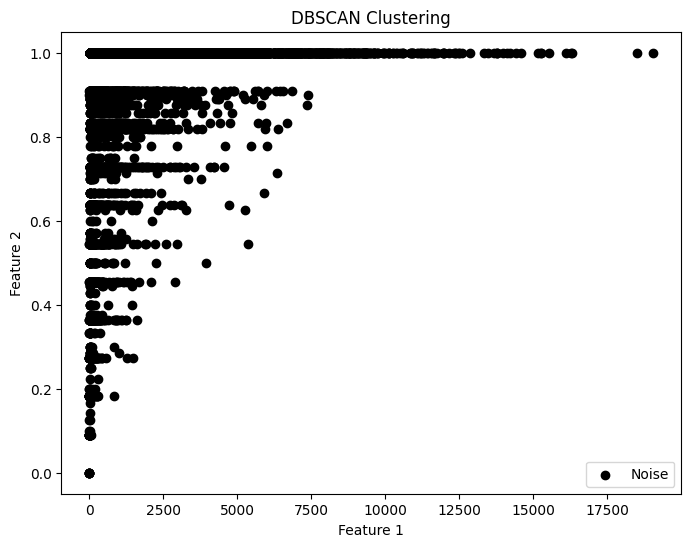

In [ ]:
from sklearn.cluster import DBSCAN

eps = 1
min_samples = 10

dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model.fit(X)

labels = dbscan_model.labels_

inertia = calculate_dbscan_inertia(X, labels)
print(f"Inertia (DBSCAN): {inertia}")

if len(set(labels)) > 1:
    silhouette_avg = dbscan_silhouette_score(X, labels)
    print(f"Silhouette Score (DBSCAN): {silhouette_avg}")
else:
    print("Silhouette Score (DBSCAN): Not defined for a single cluster")

plot_dbscan_clusters(X, labels)


# **MeanShift**

Mean Shift is a clustering algorithm that identifies clusters by shifting data points toward regions of higher density iteratively. Unlike K-Means, it doesn’t require specifying the number of clusters in advance. Instead, clusters form around high-density regions, determined by a parameter called the bandwidth (radius of the search window).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


The main function, mean_shift, performs clustering on a dataset X based on density peaks, controlled by a bandwidth parameter that specifies the search radius for each point.


Parameters:

1. X: The dataset, where each row is a data point.

2. bandwidth: The radius to search for neighbors around each point.

3. max_iters: Maximum number of iterations for the algorithm to run.

4. tol: Tolerance level for convergence, stopping if points shift by less than this value.

Initialization:

1. n_points, n_features = X.shape: Gets the number of points and features (columns) in the dataset.

2. centroids = X.copy(): Initializes each point in X as its own starting centroid.

**Iterative Mean Shift Process :**


1. Outer Loop (for _ in range(max_iters)): Runs for a maximum of max_iters iterations, updating centroids until convergence.

2. Inner Loop (for point in centroids): For each point (centroid), shifts it towards the high-density region within the bandwidth.

3. Neighbor Calculation:

  1. neighbors = X[np.linalg.norm(X - point, axis=1) < bandwidth]: Finds all points within bandwidth distance from point.

  2. new_point = neighbors.mean(axis=0): Computes the mean position of the neighboring points, effectively shifting point towards the center of its local high-density region.

  3. new_centroids.append(new_point): Appends this updated position to the list new_centroids.


**Convergence Check :**

Purpose: Checks if centroids have converged (i.e., the points have stopped shifting).

Explanation:

new_centroids = np.array(new_centroids): Converts the updated centroids list into a NumPy array.

shift = np.linalg.norm(new_centroids - centroids): Calculates the total shift by taking the Euclidean norm of the difference between the old and new centroids.

Convergence Check: If shift < tol, the algorithm stops early, and Converged! is printed to indicate that the centroids have stabilized.
Update: If not converged, centroids is updated with new_centroids for the next iteration.

**Post-Processing to Form Unique Clusters :**

Purpose: After convergence, removes duplicate centroids to identify unique clusters.

Explanation:

np.round(centroids, decimals=2): Rounds centroids to two decimal places to avoid minor numerical differences.

np.unique(..., axis=0): Removes duplicate rows (centroids) in the array, leaving only unique cluster centroids.

**Assign Each Point to the Nearest Centroid :**

Purpose: Assigns each point in X to the closest cluster centroid.

Explanation:

cdist(X, unique_centroids): Computes the pairwise Euclidean distance between each point in X and each unique centroid.

np.argmin(..., axis=1): Finds the index of the closest centroid for each point, assigning a label corresponding to the nearest centroid.

Return: Returns unique_centroids (the final cluster centroids) and labels (an array of cluster labels for each point in X).


In [ ]:
def mean_shift(X, bandwidth, max_iters=300, tol=1e-3):
    n_points, n_features = X.shape
    centroids = X.copy()

    for _ in range(max_iters):
        new_centroids = []
        for point in centroids:

            neighbors = X[np.linalg.norm(X - point, axis=1) < bandwidth]

            new_point = neighbors.mean(axis=0)
            new_centroids.append(new_point)

        new_centroids = np.array(new_centroids)
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            print("Converged!")
            break
        centroids = new_centroids

    unique_centroids = np.unique(np.round(centroids, decimals=2), axis=0)


    labels = np.argmin(cdist(X, unique_centroids), axis=1)
    return unique_centroids, labels


1. MeanShift: Performs the clustering on the dataset.

2. estimate_bandwidth: Automatically determines an appropriate bandwidth
  parameter for Mean Shift.
3. StandardScaler: Preprocesses the dataset to ensure proper scaling for
  clustering.
4. silhouette_score: Evaluates the clustering quality to determine how     well-separated the clusters are.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

**Explanation of param_grid_meanshift**

The param_grid_meanshift is a dictionary that defines the range of hyperparameters for tuning the Mean Shift clustering algorithm. By specifying multiple values for each parameter, this grid enables a systematic search for the best configuration to maximize clustering performance.

**Key Components of param_grid_meanshift :**

1. bandwidth

  Definition:

  The radius of influence for the kernel used in Mean Shift clustering.
  
  Controls how far points can "pull" each other during the clustering process.
  
  Values: [0.5, 1.0, 2.0]
  
  Tests small (0.5), medium (1.0), and large (2.0) kernel sizes.
  
  Smaller values result in more clusters because points need to be closer to form a cluster.
  
  Larger values result in fewer clusters as points farther apart are grouped together.
  
  Why Important:

  The bandwidth parameter is crucial for the performance of Mean Shift. An appropriate value ensures meaningful clusters that reflect the underlying data structure.

2. max_iter

  Definition:

  The maximum number of iterations the algorithm is allowed to perform before convergence.
  
  Values: [100, 200, 300]

  Tests different iteration limits to balance computational cost and convergence accuracy.
  
  Lower values may result in early stopping before convergence.
  
  Higher values ensure that the algorithm fully refines clusters but may increase computation time.
  
  Why Important:

  Setting an appropriate max_iter ensures that Mean Shift has enough iterations to refine the cluster centers without wasting computational resources.

In [ ]:
param_grid_meanshift = {
    'bandwidth': [0.5, 1.0, 2.0],
    'max_iter': [100, 200, 300]
}

The variables best_score and best_params_ are used to track the best-performing configuration of a clustering algorithm during hyperparameter tuning. They serve as placeholders to store the highest score achieved and the corresponding hyperparameters.

In [ ]:
meanshift_best_score = -1
meanshift_best_params = {}

1. scaler = StandardScaler()

  Purpose:

  Initializes an instance of the StandardScaler class, which standardizes the features in a dataset.
  
  Standardization rescales the data so that each feature has a mean of 0 and a standard deviation of 1.
  
  Why Important:

  
  Many machine learning and clustering algorithms (e.g., K-Means, Mean Shift) rely on distance metrics such as Euclidean distance.
  
  Features with larger ranges or magnitudes can dominate these distance calculations, leading to biased results.
  
  Standardization ensures that all features contribute equally to the model.

2. final_df_scaled = scaler.fit_transform(final_df)

  Purpose:

  Applies the scaling transformation to the dataset final_df.
  
  fit_transform performs two actions:
  
  fit: Computes the mean and standard deviation for each feature in the dataset.
  
  transform: Rescales the data using the computed mean and standard deviation.


Why This Step is Crucial

1. Clustering Sensitivity:

  Algorithms like K-Means, Mean Shift, and Hierarchical Clustering rely on distance metrics. Without scaling, features with larger ranges (e.g., income compared to age) can distort clustering results.

2. Improved Convergence:

  Standardized data helps algorithms converge faster and more reliably, avoiding issues caused by features with vastly different magnitudes.

3. Better Interpretability:

  Scaling ensures that all features contribute equally, making clustering results more representative of the actual data patterns.

In [ ]:
scaler = StandardScaler()
final_df_scaled = scaler.fit_transform(final_df)

**Explanation of K-Medoids Hyperparameter Tuning Code**

This code implements a grid search approach to tune the hyperparameters of the K-Medoids clustering algorithm. It iterates through all possible combinations of parameters defined in the param_grid_kmedoids dictionary and evaluates their performance based on the silhouette score. The goal is to identify the combination of hyperparameters that yields the best clustering results.

1. **Nested Loops for Grid Search**

  Purpose:

  Iterates over all possible combinations of hyperparameters defined in param_grid_kmedoids.

2. **Model Creation**
  
  Purpose:
  
  Creates a new KMedoids model for each combination of hyperparameters.

  The random_state ensures reproducibility of results.
  
  This model will be fit to the data in the next steps.

3. **Fitting and Predicting**

  Purpose:
  
  Fits the KMedoids model on the dataset (final_df) and predicts the cluster labels for each data point.

  labels: The cluster assignments for each data point.

4. **Handling Empty Clusters**

  Purpose:

  Ensures that all clusters contain at least one data point. If any cluster is empty, the current configuration is skipped.

  unique_labels: Set of unique cluster labels.
  
  cluster_sizes: List of data points in each cluster.

5. **Evaluating the Clustering Performance**

  Purpose:

  Computes the silhouette score for the current clustering configuration. This score measures how well-separated the clusters are (higher is better).

  Condition: Silhouette score is only meaningful if there are at least two clusters.

6. **Updating the Best Configuration**

  Purpose:

  Tracks the best hyperparameter combination based on the highest silhouette score.

In [ ]:

for bandwidth in param_grid_meanshift['bandwidth']:
    for max_iter in param_grid_meanshift['max_iter']:


        mean_shift_model = MeanShift(bandwidth=bandwidth, max_iter=max_iter, min_bin_freq=1)


        mean_shift_model.fit(final_df_scaled)


        labels = mean_shift_model.labels_
        num_clusters = len(np.unique(labels))


        if 1 < num_clusters < len(final_df_scaled):
            score = silhouette_score(final_df_scaled, labels)

            print(f"Bandwidth: {bandwidth}, Max Iter: {max_iter}, Silhouette Score: {score}")


            if score > meanshift_best_score:
                meanshift_best_score = score
                meanshift_best_params = {
                    'bandwidth': bandwidth,
                    'max_iter': max_iter
                }
        else:
            print(f"Invalid number of clusters ({num_clusters}) for bandwidth: {bandwidth}")


Bandwidth: 0.5, Max Iter: 100, Silhouette Score: 0.06692482757267765
Bandwidth: 0.5, Max Iter: 200, Silhouette Score: 0.06692482757267765
Bandwidth: 0.5, Max Iter: 300, Silhouette Score: 0.06692482757267765
Bandwidth: 1.0, Max Iter: 100, Silhouette Score: 0.06233831817382314
Bandwidth: 1.0, Max Iter: 200, Silhouette Score: 0.06233831817382314
Bandwidth: 1.0, Max Iter: 300, Silhouette Score: 0.06233831817382314
Bandwidth: 2.0, Max Iter: 100, Silhouette Score: 0.11695073026025767
Bandwidth: 2.0, Max Iter: 200, Silhouette Score: 0.11695073026025767
Bandwidth: 2.0, Max Iter: 300, Silhouette Score: 0.11695073026025767


After completing the grid search, the code prints the best silhouette score and the corresponding hyperparameters:

best_score: Highest silhouette score achieved.

best_params: Dictionary containing the optimal hyperparameter configuration.

In [ ]:
print("\nBest Score for Meanshift:", meanshift_best_score)
print("Best Parameters Meanshift:", meanshift_best_params)


Best Score for Meanshift: 0.11695073026025767
Best Parameters Meanshift: {'bandwidth': 2.0, 'max_iter': 100}


**Custom Inertia Calculation for Mean Shift**

The inertia for Mean Shift can be calculated similarly to KMeans, by summing the squared distances between each point and its nearest centroid.

In [ ]:
def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[labels == i]
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


 **Run Mean Shift and Evaluate Clustering**

Now that we have the Mean Shift clustering code, inertia calculation, silhouette score calculation, let’s run Mean Shift and evaluate the results.

In [ ]:
bandwidth = 1

centroids, labels = mean_shift(X, bandwidth)

inertia = calculate_inertia(X, centroids, labels)
print(f"Inertia (Mean Shift): {inertia}")




Converged!
Inertia (Mean Shift): 205.6947652334446


# **Hierarchical**

Hierarchical Clustering groups data points into a hierarchy of clusters, typically represented as a dendrogram. The two main types are:

1. Agglomerative: Starts with each data point as a separate cluster and merges clusters iteratively.

2. Divisive: Starts with all points in one cluster and divides them iteratively.

**Step 1: Implement Hierarchical Clustering with Agglomerative Approach**

This code performs hierarchical clustering with a distance-based approach, merging clusters iteratively based on the closest points.

linkage: Calculates the hierarchical clustering structure. The linkage_type parameter can be "ward", "single", "complete", or "average" to specify the type of linkage used.

fcluster: Extracts flat clusters from the hierarchical structure based on a specified number of clusters (num_clusters).

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def hierarchical_clustering(X, linkage_type='ward'):

    Z = linkage(X, method=linkage_type)
    return Z

def get_clusters(Z, num_clusters):

    from scipy.cluster.hierarchy import fcluster
    labels = fcluster(Z, num_clusters, criterion='maxclust')
    return labels


The code from sklearn.cluster import AgglomerativeClustering imports the Agglomerative Clustering algorithm from the sklearn.cluster module. This clustering method is part of the hierarchical clustering family and is widely used for grouping data points based on their similarity.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

**Explanation of param_grid_hierarchical**

The param_grid_hierarchical is a dictionary that defines the set of hyperparameters to tune the Agglomerative Clustering algorithm. By systematically exploring combinations of these parameters, you can optimize the clustering results for your dataset.

**Key Components of param_grid_hierarchical :**

1. **linkage**

  Definition:

  Specifies the strategy to calculate the distance between clusters when merging them.
  
  Values: ['ward', 'complete', 'average', 'single']

  ward:
  
  Minimizes the variance of the clusters being merged.
  
  Works only with Euclidean distance and is best for spherical clusters.
  
  complete:
  
  Uses the maximum distance between points in two clusters (also known as "farthest neighbor").
  
  Produces compact clusters but can be sensitive to outliers.
  
  average:
  
  Uses the average of all pairwise distances between points in two clusters.
  
  A balanced approach, good for datasets with varied cluster shapes.
  
  single:
  
  Uses the minimum distance between points in two clusters (also known as "nearest neighbor").
  
  Creates elongated clusters and is sensitive to noise.
  
  Why Important:

  Different datasets require different linkage methods to capture the true cluster structure.

2. **distance_threshold**

  Definition:

  
  The stopping criterion for merging clusters. Clusters are merged until the distance between them exceeds this threshold.
  
  Values: [5, 10, 15, 20]

  Smaller thresholds create more clusters.
  
  Larger thresholds result in fewer clusters as more distant clusters are merged.
  
  Why Important:

  
  Provides a dynamic way to determine the number of clusters, especially when n_clusters is not specified.

3. **n_clusters**

  Definition:

  
  Specifies the number of clusters to form.
  
  Values: [None]

  By setting this to None, the algorithm determines the number of clusters dynamically based on the distance_threshold.
  
  Why Important:

  Allows flexibility by enabling a distance-based stopping criterion instead of a fixed number of clusters.
  

In [ ]:
param_grid_hierarchical = {
    'linkage': ['ward', 'complete', 'average', 'single'],
    'distance_threshold': [5, 10, 15, 20],
    'n_clusters': [None]
}

The variables best_score and best_params_ are used to track the best-performing configuration of a clustering algorithm during hyperparameter tuning. They serve as placeholders to store the highest score achieved and the corresponding hyperparameters.

In [ ]:
hierarchical_best_score = -1
hierarchical_best_params = {}


**Explanation of K-Medoids Hyperparameter Tuning Code**

This code implements a grid search approach to tune the hyperparameters of the K-Medoids clustering algorithm. It iterates through all possible combinations of parameters defined in the param_grid_kmedoids dictionary and evaluates their performance based on the silhouette score. The goal is to identify the combination of hyperparameters that yields the best clustering results.

1. **Nested Loops for Grid Search**

  Purpose:

  Iterates over all possible combinations of hyperparameters defined in param_grid_kmedoids.

2. **Model Creation**
  
  Purpose:
  
  Creates a new KMedoids model for each combination of hyperparameters.

  The random_state ensures reproducibility of results.
  
  This model will be fit to the data in the next steps.

3. **Fitting and Predicting**

  Purpose:
  
  Fits the KMedoids model on the dataset (final_df) and predicts the cluster labels for each data point.

  labels: The cluster assignments for each data point.

4. **Handling Empty Clusters**

  Purpose:

  Ensures that all clusters contain at least one data point. If any cluster is empty, the current configuration is skipped.

  unique_labels: Set of unique cluster labels.
  
  cluster_sizes: List of data points in each cluster.

5. **Evaluating the Clustering Performance**

  Purpose:

  Computes the silhouette score for the current clustering configuration. This score measures how well-separated the clusters are (higher is better).

  Condition: Silhouette score is only meaningful if there are at least two clusters.

6. **Updating the Best Configuration**

  Purpose:

  Tracks the best hyperparameter combination based on the highest silhouette score.

In [ ]:

for linkage in param_grid_hierarchical['linkage']:
    for distance_threshold in param_grid_hierarchical['distance_threshold']:


        hierarchical_model = AgglomerativeClustering(
            linkage=linkage,
            distance_threshold=distance_threshold,
            n_clusters=None
        )


        hierarchical_model.fit(final_df_scaled)


        labels = hierarchical_model.labels_
        num_clusters = len(np.unique(labels))


        if 1 < num_clusters < len(final_df_scaled):
            score = silhouette_score(final_df_scaled, labels)

            print(f"Linkage: {linkage}, Distance Threshold: {distance_threshold}, Silhouette Score: {score}")


            if score > hierarchical_best_score:
                hierarchical_best_score = score
                hierarchical_best_params = {
                    'linkage': linkage,
                    'distance_threshold': distance_threshold
                }
        else:
            print(f"Invalid number of clusters ({num_clusters}) for Linkage: {linkage}, Distance Threshold: {distance_threshold}")


Linkage: ward, Distance Threshold: 5, Silhouette Score: 0.11780274990550964
Linkage: ward, Distance Threshold: 10, Silhouette Score: 0.0941843131987682
Linkage: ward, Distance Threshold: 15, Silhouette Score: 0.0948825881164104
Linkage: ward, Distance Threshold: 20, Silhouette Score: 0.11453176108799529
Linkage: complete, Distance Threshold: 5, Silhouette Score: 0.12120719476043766
Linkage: complete, Distance Threshold: 10, Silhouette Score: 0.1475127538698876
Linkage: complete, Distance Threshold: 15, Silhouette Score: 0.3531988834032379
Linkage: complete, Distance Threshold: 20, Silhouette Score: 0.53161267821762
Linkage: average, Distance Threshold: 5, Silhouette Score: 0.11583698705043134
Linkage: average, Distance Threshold: 10, Silhouette Score: 0.5507883112008866
Linkage: average, Distance Threshold: 15, Silhouette Score: 0.6750726980173889
Linkage: average, Distance Threshold: 20, Silhouette Score: 0.785262355188734
Linkage: single, Distance Threshold: 5, Silhouette Score: 0.51

After completing the grid search, the code prints the best silhouette score and the corresponding hyperparameters:

best_score: Highest silhouette score achieved.

best_params: Dictionary containing the optimal hyperparameter configuration.

In [ ]:
print("\nBest Score for Hierarchical:", hierarchical_best_score)
print("Best Parameters Hierarchical:", hierarchical_best_params)


Best Score for Hierarchical: 0.785262355188734
Best Parameters Hierarchical: {'linkage': 'average', 'distance_threshold': 20}


**Step 2: Plot Dendrogram**

The dendrogram visually represents how clusters were formed at each step of the hierarchy.

dendrogram: Plots the hierarchical relationships between clusters, showing how they merge based on distance.

In [ ]:
def plot_dendrogram(Z):
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()


**Step 3: Plot Clusters**

Once clusters are assigned, plot the points with their cluster labels.



In [ ]:
def plot_clusters(X, labels):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        cluster_points = X[labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=col, label=f'Cluster {k}')

    plt.title("Hierarchical Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


**Step 4: Inertia Calculation for Hierarchical Clustering**

Inertia is calculated by summing the squared distances between points and the centroids of their clusters.

In [ ]:
def calculate_inertia(X, labels):
    inertia = 0
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia


**Step 5: Run Hierarchical Clustering and Evaluate**

Now, let’s combine everything into a full example. This code performs hierarchical clustering, calculates inertia, and calculates the silhouette score.

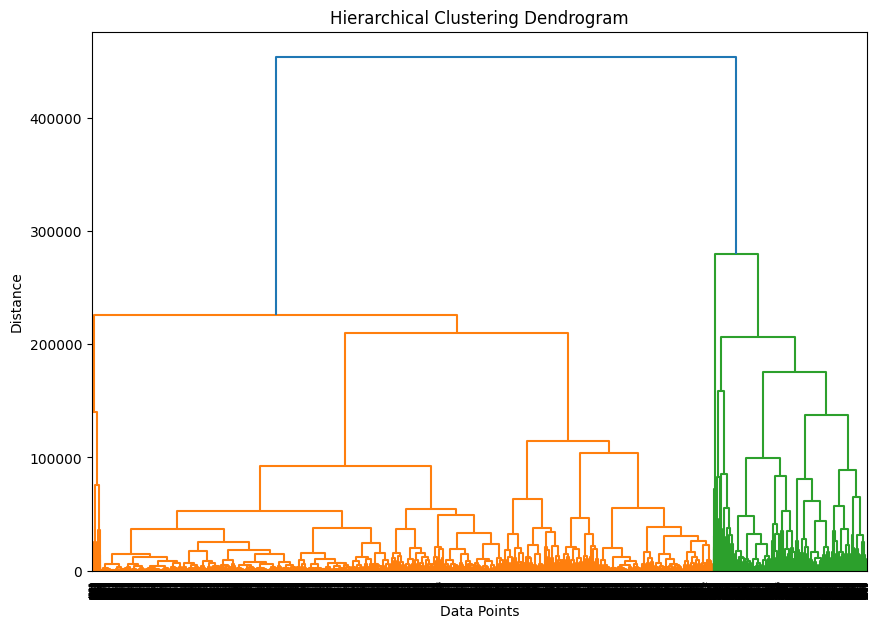

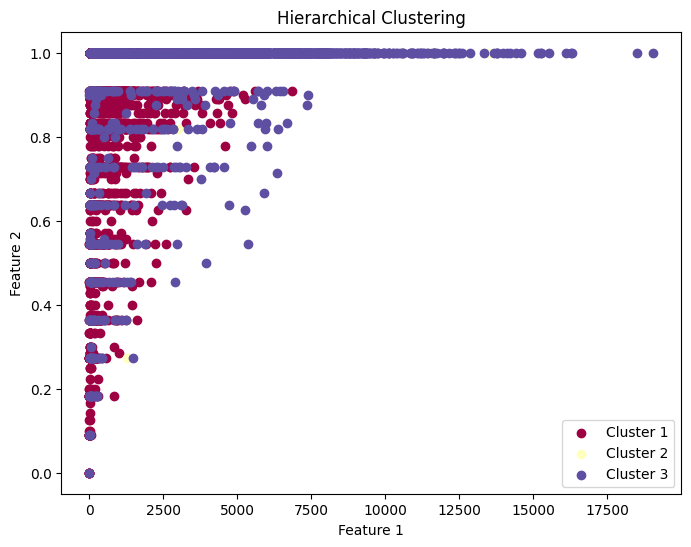

Inertia (Hierarchical Clustering): 244693513605.7419
Silhouette Score (Hierarchical Clustering): 0.49425099322858945


In [ ]:
num_clusters = 3
linkage_type = 'ward'

Z = hierarchical_clustering(X, linkage_type=linkage_type)

plot_dendrogram(Z)

labels = get_clusters(Z, num_clusters=num_clusters)

plot_clusters(X, labels)

inertia = calculate_inertia(X, labels)
print(f"Inertia (Hierarchical Clustering): {inertia}")



**Summary**

This complete code provides hierarchical clustering using the agglomerative approach, with options to customize linkage types and number of clusters. The clustering results are evaluated using both inertia and silhouette score, while the dendrogram offers insights into potential clustering structures. Hierarchical clustering is especially useful for exploring data when you want to visualize cluster relationships or avoid pre-specifying the number of clusters.

In [ ]:
import pandas as pd

data = {
    "Rank": [1, 2, 3, 4, 5],
    "Method": ["K-Menas", "Hierarchical", "Meanshift", "K-Medoid", "DBSCAN"],
    "Silhouette Score": [ 0.521174 , 0.785262 , 0.116951 ,  0.412484 , "NaN"],
    "Inertia": [ 2.035038e+11 , 2.446935e+11, 2.056948e+02 , 2.565344e+11 ,  0.0000],

}

df_clustering_summary = pd.DataFrame(data)
df_clustering_summary.to_excel("Clustering_Methods_Summary.xlsx", index=False)

print("Excel file 'Clustering_Methods_Summary.xlsx' created successfully.")


Excel file 'Clustering_Methods_Summary.xlsx' created successfully.


In [ ]:
summary_table = pd.read_excel("Clustering_Methods_Summary.xlsx")
summary_table

Rank        Method  Silhouette Score       Inertia
0     1       K-Menas          0.521174  2.035038e+11
1     2  Hierarchical          0.785262  2.446935e+11
2     3     Meanshift          0.116951  2.056948e+02
3     4      K-Medoid          0.412484  2.565344e+11
4     5        DBSCAN               NaN  0.000000e+00

1. K-Means Clustering

   Inertia: Provides a measure of how tightly points are grouped within clusters, with lower values indicating more compact clusters.

   Silhouette Score: Measures the separation between clusters, with higher scores (closer to 1) indicating well-defined clusters.

   Result Summary: K-Means is computationally efficient and works well for spherical or uniformly distributed clusters. However, it may struggle if the dataset contains clusters of varying densities or non-spherical shapes.

2. K-Medoids Clustering

   Inertia: Similar to K-Means, but calculated based on medoids (actual data points as cluster centers), making it more robust to outliers.
   
   Silhouette Score: Consistently evaluated for cluster quality.
   
   Result Summary: K-Medoids performs well on datasets with noise and outliers, as it selects actual data points as centers, reducing sensitivity to extreme values. This method may be preferable if there are outliers or a small number of clusters.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

   Key Parameters: eps (radius for neighborhood search) and min_samples (minimum points to form a dense region).
   
   Silhouette Score: Generally higher for datasets with well-separated clusters.
   
   Result Summary: DBSCAN excels at identifying clusters of varying shapes and densities, while automatically labeling low-density regions as noise (outliers). It is a strong choice if the dataset has clusters of irregular shapes or if noise identification is important. However, its performance depends heavily on parameter tuning.

4. Mean Shift Clustering

   Inertia: Calculated similarly but adjusted for density-based shifts.
   
   Silhouette Score: High scores indicate clear density-based cluster separations.
   
   Result Summary: Mean Shift automatically identifies the number of clusters based on density peaks. This method is advantageous for non-parametric clustering but can be computationally intensive on large datasets. It works best for data with distinct high-density regions.

5. Hierarchical Clustering

   Dendrogram Analysis: Visualizes the hierarchical structure, aiding in choosing the optimal number of clusters.
   
   Inertia and Silhouette Score: Assesses compactness and separation between clusters.
   
   Result Summary: Hierarchical clustering offers a flexible approach that doesn’t require pre-defining the number of clusters. It’s especially useful for understanding cluster relationships and is ideal if you need to visually determine clusters through a dendrogram. However, it can be computationally intensive on large datasets.
